## Jeopardy NLTK Word Cloud & TF- IDF Analysis

In [1]:
#Import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import NMF

path = ('./Resources/QuestionsSQL.csv')


In [2]:
questions_csv = pd.read_csv(path).drop(columns = 'Unnamed: 0')

In [3]:
questions_csv

,game_id,question_text,answer,category
0,3901,"A longshot who wins, or a ""Star Wars"" comic bo...",a dark horse,"""DAR"""
1,3901,"A term of endearment, like for my Clementine",darling,"""DAR"""
2,3901,It's the Turkish strait seen here,the Dardanelles,"""DAR"""
3,3901,The inner bull's eye is commonly worth 50 poin...,darts,"""DAR"""
4,3901,This capital of Australia's Northern Territory...,Darwin,"""DAR"""
...,...,...,...,...
49890,4385,Alexander Solzhenitsyn spent years in the Gula...,Stalin,WRITERS IN PRISON
49891,4385,"An author, statesman & saint, he was jailed in...",Thomas More,WRITERS IN PRISON
49892,4385,He spent 30 days in jail for vagrancy in 1894 ...,Jack London,WRITERS IN PRISON
49893,4385,"The ""idiot""! He got mixed up with the Petrashe...",Dostoyevsky,WRITERS IN PRISON


## NLTK processes to tokenize bag of words from Jeopardy Data

In [4]:
# let joins all the title rows and tokenize them into words
questions =" ".join(questions_csv['question_text'])
answers = " ".join(questions_csv['answer'])
categories = " ".join(questions_csv['category'])
question_words = word_tokenize(questions)
answer_words = word_tokenize(answers)
category_words = word_tokenize(categories)

In [5]:
#Create a function to iterate through data, normalize the data, remove all stopwords,
# and produce lemmas (basic form of words)
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [6]:
question_word_freq = clean_words(question_words)
answer_word_freq = clean_words(answer_words)
category_word_freq = clean_words(category_words)

In [7]:
#Create a count of common words found in Jeopardy questions, answers, and categories
question_freq = Counter(question_word_freq)

In [8]:
answer_freq = Counter(answer_word_freq)

In [9]:
category_freq = Counter(category_word_freq)

In [10]:
#Convert enumerated word counts into dataframes
question_count_df = pd.DataFrame(question_freq.items(),columns=['Word','Count'])
answer_count_df = pd.DataFrame(answer_freq.items(),columns=['Word','Count'])
category_count_df = pd.DataFrame(category_freq.items(),columns=['Word','Count'])


In [11]:
#Explored dataframes to ensure no null values existed
question_count_df.sort_values(by = 'Count', ascending = False)

question_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39529 entries, 0 to 39528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    39529 non-null  object
 1   Count   39529 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 617.8+ KB


In [12]:
answer_count_df.sort_values(by =['Count'], ascending = False)

answer_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    19705 non-null  object
 1   Count   19705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 308.0+ KB


In [13]:
#Wrote dataframes to *.CSV for further analysis
question_count_df.to_csv('question_count_NLTK.csv')
answer_count_df.to_csv('answer_count_NLTK.csv')
category_count_df.to_csv('category_count_NLTK.csv')


In [14]:
#Converted dataframe to a dicitionary of tuples for processing by WordCloud
data_Cat = dict(category_count_df[['Word', 'Count']].itertuples(index=False, name=None))
data_Ques = dict(question_count_df[['Word', 'Count']].itertuples(index=False, name=None))
data_Ans = dict(answer_count_df[['Word', 'Count']].itertuples(index=False, name=None))



## Word Cloud Visuals

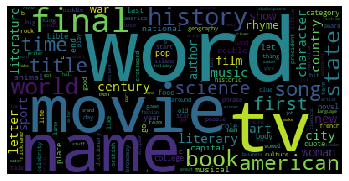

<Figure size 2880x1440 with 0 Axes>

In [15]:
#Created WordCloud Visuals for later presentation
wc_Cat = WordCloud().generate_from_frequencies(data_Cat)
wc_Cat.to_file("./Images/Category_Cloud_NLTK.png")

plt.imshow(wc_Cat)
plt.axis('off')
plt.figure( figsize=(40,20) )
plt.show()

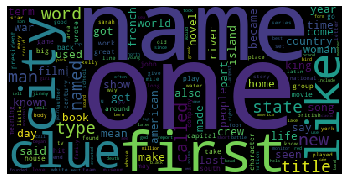

<Figure size 2880x1440 with 0 Axes>

In [16]:
wc_Cat = WordCloud().generate_from_frequencies(data_Ques)
wc_Cat.to_file("./Images/Question_Cloud_NLTK.png")

plt.imshow(wc_Cat)
plt.axis('off')
plt.figure( figsize=(40,20) )
plt.show()

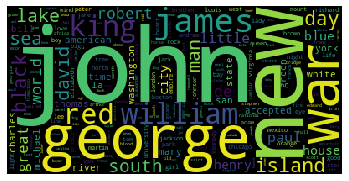

<Figure size 2880x1440 with 0 Axes>

In [17]:
wc_Cat = WordCloud().generate_from_frequencies(data_Ans)
wc_Cat.to_file("./Images/Answer_Cloud_NLTK.png")

plt.imshow(wc_Cat)
plt.axis('off')
plt.figure( figsize=(40,20) )
plt.show()

## Calculating TF-IDF Values and performing supervised machine learning to evaluate whether a Jeopardy category has a strong influence on natural language predictions


In [18]:


questions_csv['text'] = questions_csv['category'] + ' ' + questions_csv['question_text'] + ' ' + questions_csv['answer'].astype(str)

In [19]:
questions_csv

,game_id,question_text,answer,category,text
0,3901,"A longshot who wins, or a ""Star Wars"" comic bo...",a dark horse,"""DAR""","""DAR"" A longshot who wins, or a ""Star Wars"" co..."
1,3901,"A term of endearment, like for my Clementine",darling,"""DAR""","""DAR"" A term of endearment, like for my Clemen..."
2,3901,It's the Turkish strait seen here,the Dardanelles,"""DAR""","""DAR"" It's the Turkish strait seen here the Da..."
3,3901,The inner bull's eye is commonly worth 50 poin...,darts,"""DAR""","""DAR"" The inner bull's eye is commonly worth 5..."
4,3901,This capital of Australia's Northern Territory...,Darwin,"""DAR""","""DAR"" This capital of Australia's Northern Ter..."
...,...,...,...,...,...
49890,4385,Alexander Solzhenitsyn spent years in the Gula...,Stalin,WRITERS IN PRISON,WRITERS IN PRISON Alexander Solzhenitsyn spent...
49891,4385,"An author, statesman & saint, he was jailed in...",Thomas More,WRITERS IN PRISON,"WRITERS IN PRISON An author, statesman & saint..."
49892,4385,He spent 30 days in jail for vagrancy in 1894 ...,Jack London,WRITERS IN PRISON,WRITERS IN PRISON He spent 30 days in jail for...
49893,4385,"The ""idiot""! He got mixed up with the Petrashe...",Dostoyevsky,WRITERS IN PRISON,"WRITERS IN PRISON The ""idiot""! He got mixed up..."


In [20]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(questions_csv['question_text']) 
print(v.vocabulary_)

{'longshot': 25147, 'who': 45701, 'wins': 45916, 'or': 30066, 'star': 39857, 'wars': 45227, 'comic': 9759, 'book': 6257, 'publisher': 33549, 'term': 41813, 'of': 29736, 'endearment': 14630, 'like': 24733, 'for': 16784, 'my': 28400, 'clementine': 9274, 'it': 22296, 'the': 41963, 'turkish': 43390, 'strait': 40282, 'seen': 37353, 'here': 19969, 'inner': 21746, 'bull': 7079, 'eye': 15555, 'is': 22214, 'commonly': 9834, 'worth': 46180, '50': 1225, 'points': 32402, 'in': 21382, 'this': 42095, 'game': 17512, 'capital': 7747, 'australia': 4196, 'northern': 29303, 'territory': 41856, 'named': 28509, 'an': 2947, 'evolutionary': 15242, 'scientist': 37022, 'depicting': 12305, 'native': 28636, 'americans': 2856, 'george': 17838, 'catlin': 8143, 'often': 29781, 'painted': 30658, 'beast': 5095, 'as': 3810, 'assiniboine': 3922, 'indians': 21506, 'pursuing': 33729, 'on': 29922, 'snowshoes': 38960, 'impressionist': 21347, 'painter': 30659, 'was': 45237, 'father': 15830, 'jean': 22522, 'director': 12834,

In [21]:
all_feature_names = v.get_feature_names_out(questions_csv['text'])

all_feature_names_cleaned =clean_words(all_feature_names)

In [22]:
for word in all_feature_names_cleaned:
    index = v.vocabulary_.get(word)
    print(f'{word}, {v.idf_[index]}')

aa, 10.025936648977904
aaa, 10.208258205771859
aaaee, 11.124548937646013
aachen, 11.124548937646013
aak, 11.124548937646013
aalenian, 11.124548937646013
aalto, 11.124548937646013
aam, 10.71908382953785
aar, 11.124548937646013
aardman, 11.124548937646013
aardvark, 10.71908382953785
aardvark, 10.71908382953785
aaron, 8.873257139039518
aarp, 10.71908382953785
aau, 11.124548937646013
ab, 10.431401757086068
aba, 10.431401757086068
ababa, 10.71908382953785
abaca, 11.124548937646013
abacus, 11.124548937646013
aback, 11.124548937646013
abactor, 11.124548937646013
abacus, 11.124548937646013
abaddon, 11.124548937646013
abamasum, 11.124548937646013
abandon, 10.208258205771859
abandoned, 9.045107395966177
abandoning, 11.124548937646013
abated, 11.124548937646013
abatement, 11.124548937646013
abba, 10.208258205771859
abbas, 10.71908382953785
abbasid, 11.124548937646013
abbe, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
abbey, 8.450400288219484
abbi, 11.124548937

addition, 8.206778205561733
additive, 10.431401757086068
address, 7.847404204653837
addressed, 9.515111025211914
address, 7.847404204653837
addressing, 10.71908382953785
add, 7.386879319362645
addy, 10.71908382953785
adelaide, 9.871785969150645
adele, 9.332789468417959
adelie, 10.71908382953785
adenoidectomy, 11.124548937646013
adept, 10.431401757086068
adequate, 10.431401757086068
adequately, 11.124548937646013
adh, 11.124548937646013
adhara, 11.124548937646013
adhd, 10.208258205771859
adhere, 11.124548937646013
adhered, 11.124548937646013
adherence, 10.71908382953785
adheres, 10.71908382953785
adhesive, 9.419800845407588
adhesive, 9.419800845407588
adi, 11.124548937646013
adidas, 11.124548937646013
adios, 10.71908382953785
adipose, 11.124548937646013
adirondack, 11.124548937646013
adirondacks, 10.71908382953785
adjacent, 9.515111025211914
adjective, 6.570672046045472
adjectivefor, 11.124548937646013
adjective, 6.570672046045472
adjoining, 10.71908382953785
adjoins, 11.124548937646013

airport, 7.39885551040936
airport, 7.39885551040936
airship, 10.208258205771859
airship, 10.208258205771859
airshow, 11.124548937646013
airtight, 10.025936648977904
airwave, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
airway, 10.71908382953785
airway, 10.71908382953785
airwolf, 11.124548937646013
airy, 11.124548937646013
aisle, 10.71908382953785
aisle, 10.71908382953785
aitcheson, 11.124548937646013
aix, 11.124548937646013
ajaccio, 11.124548937646013
ajax, 10.71908382953785
ajay, 11.124548937646013
aje, 11.124548937646013
aka, 6.544696559642212
akadimias, 11.124548937646013
akaka, 11.124548937646013
akasha, 11.124548937646013
akbar, 10.431401757086068
akc, 10.208258205771859
akebono, 11.124548937646013
akela, 11.124548937646013
akershus, 11.124548937646013
akhenaten, 11.124548937646013
akin, 11.124548937646013
akins, 11.124548937646013
akira, 10.71908382953785
akiyama, 11.124548937646013
akkadian, 11.124548937646013
akoya, 11.124548937646013
akron,

amaru, 11.124548937646013
amass, 11.124548937646013
amassed, 11.124548937646013
amateur, 9.252746760744422
amateur, 9.252746760744422
amati, 10.71908382953785
amatitan, 11.124548937646013
amato, 11.124548937646013
amatoria, 11.124548937646013
amauti, 11.124548937646013
amazed, 10.71908382953785
amazement, 11.124548937646013
amazin, 11.124548937646013
amazing, 8.416498736543804
amazingly, 10.431401757086068
amazon, 8.321188556739479
amazona, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
amazonia, 11.124548937646013
amazon, 8.321188556739479
ambassador, 8.682201902276809
ambassadorfor, 11.124548937646013
ambassador, 8.682201902276809
amber, 9.515111025211914
ambercup, 11.124548937646013
ambergris, 11.124548937646013
ambi, 11.124548937646013
ambient, 11.124548937646013
ambiguity, 10.71908382953785
ambiguous, 10.431401757086068
ambition, 10.431401757086068
ambition, 10.431401757086068
ambitious, 10.208258205771859
ambre, 11.124548937646013
ambrogio, 11.1

annoyingly, 11.124548937646013
annoys, 11.124548937646013
annual, 7.583589613608699
annually, 8.821963844651968
annulations, 11.124548937646013
annulled, 10.71908382953785
annunciation, 11.124548937646013
anoa, 11.124548937646013
anointing, 11.124548937646013
anole, 11.124548937646013
anomala, 11.124548937646013
anomaly, 10.71908382953785
anon, 11.124548937646013
anonos, 11.124548937646013
anonymous, 9.871785969150645
anopheles, 11.124548937646013
another, 6.230447459805709
anouilh, 11.124548937646013
anse, 11.124548937646013
ansel, 11.124548937646013
ansom, 11.124548937646013
answer, 8.383708913720813
answered, 10.025936648977904
answering, 11.124548937646013
answer, 8.383708913720813
ant, 9.515111025211914
antacid, 10.431401757086068
antagonist, 10.71908382953785
antananarivo, 11.124548937646013
antarctic, 9.515111025211914
antarctica, 9.252746760744422
antares, 10.208258205771859
ante, 10.71908382953785
anteater, 11.124548937646013
anteater, 11.124548937646013
antebellum, 11.1245489

arctic, 8.52185925220163
arcturus, 10.71908382953785
arcy, 11.124548937646013
arden, 10.431401757086068
ardennes, 11.124548937646013
ardent, 11.124548937646013
ardor, 11.124548937646013
area, 6.10396331269659
areacalled, 11.124548937646013
area, 6.10396331269659
arecibo, 11.124548937646013
arena, 8.984482774149743
arena, 8.984482774149743
are, 4.249833512742077
aretha, 9.871785969150645
arezzo, 11.124548937646013
arf, 11.124548937646013
arg, 11.124548937646013
argentina, 8.262348056716544
argentine, 9.620471540869739
argentinian, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
argentino, 11.124548937646013
argentum, 11.124548937646013
arginine, 11.124548937646013
argo, 9.871785969150645
argon, 10.025936648977904
argonaut, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
argo, 9.871785969150645
argot, 11.124548937646013
argue, 10.71908382953785
argued, 9.620471540869739
argues, 11.124548937646013
arguing, 11.124548937646

asunder, 11.124548937646013
aswan, 10.208258205771859
asylum, 9.738254576526122
asylum, 9.738254576526122
asymmetrical, 11.124548937646013
asymptote, 11.124548937646013
atacama, 10.71908382953785
atahualpa, 11.124548937646013
atari, 10.431401757086068
ataturk, 10.71908382953785
atchafalaya, 11.124548937646013
atchison, 11.124548937646013
ate, 8.873257139039518
atf, 10.71908382953785
atfe, 11.124548937646013
atheism, 10.431401757086068
atheist, 10.208258205771859
atheistic, 11.124548937646013
athena, 9.332789468417959
athenaeum, 11.124548937646013
atheneum, 11.124548937646013
athenian, 9.515111025211914
athenian, 9.515111025211914
athens, 8.559599580184477
atherosclerosis, 11.124548937646013
athlete, 8.383708913720813
athlete, 8.383708913720813
athletic, 9.045107395966177
athletics, 10.431401757086068
atholl, 11.124548937646013
athos, 10.208258205771859
athwart, 11.124548937646013
atilliator, 11.124548937646013
ation, 10.71908382953785
ative, 11.124548937646013
atkins, 10.71908382953785

azo, 11.124548937646013
azoff, 11.124548937646013
azores, 10.208258205771859
azov, 11.124548937646013
aztec, 9.419800845407588
azteca, 11.124548937646013
aztec, 9.419800845407588
azur, 11.124548937646013
azure, 10.71908382953785
açu, 11.124548937646013
açúcar, 11.124548937646013
años, 11.124548937646013
ba, 10.025936648977904
baaack, 11.124548937646013
baah, 11.124548937646013
baal, 10.71908382953785
baalshamin, 11.124548937646013
baan, 11.124548937646013
baarn, 11.124548937646013
bab, 11.124548937646013
baba, 10.431401757086068
babalu, 11.124548937646013
babar, 10.71908382953785
babbit, 11.124548937646013
babbitt, 10.208258205771859
babble, 11.124548937646013
babbling, 11.124548937646013
babbo, 11.124548937646013
babe, 8.984482774149743
babel, 11.124548937646013
babe, 8.984482774149743
baby, 6.774271001286712
baboon, 11.124548937646013
babs, 10.71908382953785
babuino, 11.124548937646013
babur, 11.124548937646013
baby, 6.774271001286712
babyface, 11.124548937646013
babylon, 9.620471540

barenboim, 11.124548937646013
barents, 11.124548937646013
barfly, 10.431401757086068
bargain, 10.208258205771859
bargaining, 10.71908382953785
bargain, 10.208258205771859
barge, 10.208258205771859
barhopping, 11.124548937646013
barista, 10.71908382953785
baristas, 11.124548937646013
baritone, 10.431401757086068
bark, 8.984482774149743
barker, 10.431401757086068
barker, 10.431401757086068
barking, 10.208258205771859
barkley, 11.124548937646013
bark, 8.984482774149743
barley, 10.025936648977904
barlow, 11.124548937646013
barmaid, 11.124548937646013
barn, 9.871785969150645
barnabas, 10.431401757086068
barnacle, 10.71908382953785
barnacle, 10.71908382953785
barnard, 10.71908382953785
barnes, 9.738254576526122
barney, 9.332789468417959
barn, 9.871785969150645
barnum, 9.620471540869739
barnyard, 10.208258205771859
barometer, 10.431401757086068
barometric, 11.124548937646013
baron, 9.252746760744422
barone, 10.71908382953785
baroness, 10.431401757086068
baronet, 11.124548937646013
baronial, 1

befriends, 10.431401757086068
beg, 10.71908382953785
bega, 11.124548937646013
began, 6.071492927665806
begbie, 11.124548937646013
beggar, 10.431401757086068
beggarman, 11.124548937646013
beggar, 10.431401757086068
begged, 10.431401757086068
begin, 7.925875820095332
begining, 11.124548937646013
beginner, 10.71908382953785
beginner, 10.71908382953785
beginning, 7.473890696352274
beginning, 7.473890696352274
begin, 7.925875820095332
begley, 11.124548937646013
begorrah, 11.124548937646013
begs, 11.124548937646013
begun, 8.321188556739479
behalf, 10.208258205771859
behan, 11.124548937646013
behar, 11.124548937646013
behave, 10.431401757086068
behaved, 10.71908382953785
behaves, 10.431401757086068
behavior, 8.450400288219484
behavioral, 11.124548937646013
behaviour, 11.124548937646013
behead, 11.124548937646013
beheaded, 10.208258205771859
beheading, 10.025936648977904
beheld, 10.208258205771859
behemoth, 9.871785969150645
behest, 11.124548937646013
behind, 7.212525932217867
behistun, 11.124

bikel, 10.71908382953785
biker, 11.124548937646013
bikers, 11.124548937646013
bike, 10.208258205771859
bikini, 10.208258205771859
bikini, 10.208258205771859
bikku, 11.124548937646013
biko, 11.124548937646013
bikram, 10.71908382953785
bil, 10.208258205771859
bilbao, 11.124548937646013
bilbo, 11.124548937646013
bile, 9.871785969150645
bilingual, 10.71908382953785
bilirubin, 11.124548937646013
bilkis, 11.124548937646013
bill, 6.699702305789203
billboard, 8.927324360309793
billed, 9.419800845407588
billiards, 10.71908382953785
billie, 9.620471540869739
billiionaire, 11.124548937646013
billina, 11.124548937646013
billing, 10.025936648977904
billing, 10.025936648977904
billion, 6.973509031747367
billionaire, 9.045107395966177
billionaire, 9.045107395966177
billion, 6.973509031747367
bill, 6.699702305789203
billy, 7.569200876156599
billy, 7.569200876156599
biloba, 11.124548937646013
biloxi, 11.124548937646013
bilson, 10.71908382953785
bilt, 11.124548937646013
biltmore, 10.71908382953785
bilto

blt, 10.71908382953785
blub, 11.124548937646013
blubbering, 11.124548937646013
blucher, 11.124548937646013
bludgeon, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
blue, 6.41052434674584
blueback, 11.124548937646013
blueberry, 11.124548937646013
blueberry, 11.124548937646013
bluebird, 11.124548937646013
bluefin, 11.124548937646013
bluegill, 11.124548937646013
bluegrass, 9.871785969150645
bluejacket, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
bluenose, 11.124548937646013
blueprint, 10.71908382953785
bluer, 11.124548937646013
blue, 6.41052434674584
blueshift, 11.124548937646013
bluesman, 10.71908382953785
bluest, 10.71908382953785
bluesy, 11.124548937646013
bluetooth, 11.124548937646013
bluff, 10.025936648977904
bluffing, 11.124548937646013
bluff, 10.025936648977904
bluford, 11.124548937646013
bluish, 10.208258205771859
blum, 11.124548937646013
blume, 10.71908382953785
blumenbach, 11.124548937646013
blunder, 10.025

bouncer, 10.71908382953785
bounce, 11.124548937646013
bouncing, 10.025936648977904
bound, 9.1786387885907
boundary, 8.726653664847642
boundary, 8.726653664847642
bounded, 10.431401757086068
boundless, 10.71908382953785
bound, 9.1786387885907
bounty, 9.1786387885907
bouquet, 10.208258205771859
bouquet, 10.208258205771859
bourbon, 9.109645917103748
bourdain, 11.124548937646013
bourgeois, 10.71908382953785
bourgeoisie, 11.124548937646013
bourguignon, 10.71908382953785
bourguignonne, 11.124548937646013
bourke, 11.124548937646013
bourne, 9.871785969150645
boussac, 11.124548937646013
bout, 9.419800845407588
boutique, 10.71908382953785
bouton, 11.124548937646013
boutonniere, 11.124548937646013
boutros, 10.71908382953785
bout, 9.419800845407588
bouvier, 10.431401757086068
bouwerie, 11.124548937646013
bovary, 10.431401757086068
bovine, 9.252746760744422
bovine, 9.252746760744422
bow, 8.450400288219484
bowdoin, 10.71908382953785
bowdre, 11.124548937646013
bowed, 10.71908382953785
bowel, 11.12454

broca, 10.71908382953785
broccoli, 11.124548937646013
brochure, 11.124548937646013
brock, 10.71908382953785
brocklehurst, 11.124548937646013
brod, 11.124548937646013
broderick, 10.208258205771859
brodeur, 11.124548937646013
brodie, 10.71908382953785
brody, 9.738254576526122
brogue, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
broiled, 11.124548937646013
broiling, 10.71908382953785
broke, 7.706822254032647
brokeback, 10.71908382953785
broken, 8.206778205561733
broker, 10.025936648977904
brokerage, 10.431401757086068
brolin, 10.208258205771859
bromance, 11.124548937646013
bromden, 11.124548937646013
bromeliad, 11.124548937646013
bromine, 11.124548937646013
brompton, 11.124548937646013
bronc, 11.124548937646013
bronchus, 11.124548937646013
bronchial, 11.124548937646013
bronchiole, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
bronchitis, 11.124548937646013
broncho, 11.124548937646013
bronchus, 11.124548937646013
bron

burrow, 10.208258205771859
burrowing, 10.208258205771859
burrow, 10.208258205771859
burr, 10.431401757086068
burset, 11.124548937646013
burst, 9.515111025211914
bursting, 10.208258205771859
burst, 9.515111025211914
burstyn, 11.124548937646013
burt, 9.419800845407588
burton, 9.252746760744422
buru, 11.124548937646013
burundi, 10.431401757086068
bury, 9.871785969150645
burying, 10.208258205771859
bus, 8.485491608030754
buscemi, 11.124548937646013
busch, 10.025936648977904
bus, 8.485491608030754
busey, 10.208258205771859
bush, 7.9890547217168635
bushel, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
bushman, 10.71908382953785
bushmiller, 11.124548937646013
bushmills, 11.124548937646013
bushnell, 10.71908382953785
bushrangers, 11.124548937646013
bushwhile, 11.124548937646013
bushy, 10.71908382953785
busiest, 9.332789468417959
business, 7.099197246910864
business, 7.099197246910864
businessman, 9.515111025211914
businessmen, 10.208258205771859
businesswoma

candidacy, 10.208258205771859
candidate, 7.9890547217168635
candidate, 7.9890547217168635
candide, 10.71908382953785
candidum, 11.124548937646013
candy, 7.847404204653837
candiru, 11.124548937646013
candle, 9.1786387885907
candleholder, 11.124548937646013
candlelight, 10.71908382953785
candlemaking, 11.124548937646013
candlemas, 11.124548937646013
candlepower, 11.124548937646013
candle, 9.1786387885907
candlestick, 11.124548937646013
candlestick, 11.124548937646013
candy, 7.847404204653837
candycaine, 11.124548937646013
cane, 10.025936648977904
canibus, 11.124548937646013
canicida, 11.124548937646013
canid, 11.124548937646013
canid, 11.124548937646013
canine, 8.206778205561733
canine, 8.206778205561733
caning, 11.124548937646013
canio, 11.124548937646013
canis, 9.871785969150645
canister, 11.124548937646013
canister, 11.124548937646013
cannabis, 11.124548937646013
cannary, 11.124548937646013
canned, 9.515111025211914
cannery, 11.124548937646013
cannes, 10.71908382953785
cannibal, 10.71

cassidy, 9.620471540869739
cassie, 11.124548937646013
cassini, 9.871785969150645
cassino, 11.124548937646013
cassio, 10.208258205771859
cassis, 11.124548937646013
cassius, 10.431401757086068
cassone, 11.124548937646013
cassoulet, 11.124548937646013
cassowary, 11.124548937646013
cast, 7.792344427470809
castalian, 11.124548937646013
castamere, 11.124548937646013
castaway, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
caste, 10.431401757086068
castellaneta, 11.124548937646013
castellano, 11.124548937646013
casterbridge, 11.124548937646013
caste, 10.431401757086068
castile, 9.620471540869739
castilian, 10.71908382953785
castillo, 10.431401757086068
castillon, 11.124548937646013
casting, 10.71908382953785
castle, 7.774644850371408
castlebury, 11.124548937646013
castlereagh, 11.124548937646013
castle, 7.774644850371408
castling, 11.124548937646013
castoffs, 11.124548937646013
castor, 10.025936648977904
castorp, 11.124548937646013
castrated, 11.124548937646

chaleur, 11.124548937646013
chalk, 10.431401757086068
chalkboard, 10.71908382953785
chalke, 11.124548937646013
chalky, 10.71908382953785
challenge, 8.639642287858013
challenged, 9.620471540869739
challenger, 9.515111025211914
challenger, 9.515111025211914
challenge, 8.639642287858013
challenging, 9.871785969150645
chalmers, 11.124548937646013
chama, 11.124548937646013
chamber, 8.383708913720813
chambered, 10.71908382953785
chamberlain, 10.025936648977904
chamber, 8.383708913720813
chambersburg, 11.124548937646013
chambray, 11.124548937646013
chambrin, 11.124548937646013
chameleon, 11.124548937646013
chameleon, 11.124548937646013
chamizal, 11.124548937646013
chamonix, 10.71908382953785
chamorro, 11.124548937646013
chamouni, 11.124548937646013
champ, 8.598820293337758
champagne, 9.252746760744422
champaign, 10.431401757086068
champion, 8.262348056716544
championed, 10.025936648977904
championing, 10.71908382953785
champion, 8.262348056716544
championship, 9.045107395966177
championship, 

chippery, 11.124548937646013
chippewa, 11.124548937646013
chipping, 11.124548937646013
chip, 8.873257139039518
chiputneticook, 11.124548937646013
chiricahua, 10.431401757086068
chiromancy, 11.124548937646013
chiron, 10.431401757086068
chiropody, 11.124548937646013
chiroptera, 11.124548937646013
chirp, 10.71908382953785
chirp, 10.71908382953785
chisel, 11.124548937646013
chiseled, 11.124548937646013
chiswick, 11.124548937646013
chitambo, 11.124548937646013
chitin, 11.124548937646013
chitonomyces, 11.124548937646013
chivalric, 10.71908382953785
chivalry, 11.124548937646013
chive, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
chiwetel, 11.124548937646013
chloe, 10.71908382953785
chloric, 11.124548937646013
chloride, 10.431401757086068
chlorine, 10.025936648977904
chloro, 11.124548937646013
chlorofluoro, 11.124548937646013
chlorophyll, 11.124548937646013
chmerkovskiy, 11.124548937646013
cho, 9.871785969150645
chock, 11.124548937646013
chocolat, 10.719083

cleanser, 10.71908382953785
cleansing, 10.431401757086068
cleanup, 11.124548937646013
clear, 8.10412405150165
clearance, 10.71908382953785
clearasil, 11.124548937646013
cleared, 10.431401757086068
clearing, 10.431401757086068
clearly, 10.208258205771859
clear, 8.10412405150165
cleary, 10.208258205771859
cleat, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
cleavage, 11.124548937646013
cleave, 11.124548937646013
cleaving, 10.71908382953785
cleese, 10.431401757086068
cleeve, 11.124548937646013
clef, 11.124548937646013
cleft, 10.71908382953785
clegane, 11.124548937646013
clemency, 11.124548937646013
clemens, 10.431401757086068
clement, 10.025936648977904
clementine, 10.71908382953785
clementinum, 11.124548937646013
clements, 10.71908382953785
clemm, 11.124548937646013
clemons, 11.124548937646013
clemson, 11.124548937646013
cleo, 11.124548937646013
cleopatra, 9.252746760744422
clergy, 10.025936648977904
clergyman, 9.738254576526122
cleric, 10.208258205771

collinsport, 11.124548937646013
collinsworth, 11.124548937646013
collision, 10.431401757086068
collision, 10.431401757086068
collodion, 11.124548937646013
colloquial, 11.124548937646013
colloquy, 11.124548937646013
colloredo, 11.124548937646013
collyer, 11.124548937646013
colo, 10.71908382953785
cologne, 10.208258205771859
colom, 11.124548937646013
coloma, 11.124548937646013
colombia, 8.927324360309793
colombian, 9.871785969150645
colombian, 9.871785969150645
colombina, 11.124548937646013
colombo, 11.124548937646013
colon, 10.208258205771859
colonel, 9.515111025211914
colonel, 9.515111025211914
colonial, 8.639642287858013
colonialism, 11.124548937646013
colony, 7.905673112777812
colonist, 11.124548937646013
colonist, 11.124548937646013
colonization, 10.208258205771859
colonized, 10.431401757086068
colonizer, 11.124548937646013
colonnade, 11.124548937646013
colonus, 10.71908382953785
colony, 7.905673112777812
color, 6.560200746178177
colorado, 7.792344427470809
colorant, 11.124548937646

conditional, 10.431401757086068
conditioned, 10.71908382953785
conditioning, 10.71908382953785
condition, 7.583589613608699
condomine, 11.124548937646013
condon, 11.124548937646013
condone, 11.124548937646013
condor, 11.124548937646013
condores, 11.124548937646013
conducive, 11.124548937646013
conduct, 8.873257139039518
conducted, 9.1786387885907
conducting, 10.431401757086068
conductive, 11.124548937646013
conductivity, 11.124548937646013
conductor, 9.252746760744422
conductor, 9.252746760744422
conduct, 8.873257139039518
cone, 8.773173680482536
conehead, 11.124548937646013
coneheads, 11.124548937646013
cone, 8.773173680482536
conestoga, 11.124548937646013
coney, 10.431401757086068
confab, 11.124548937646013
confection, 10.71908382953785
confectioner, 10.71908382953785
confectionery, 11.124548937646013
confederacy, 8.873257139039518
confederate, 8.52185925220163
confederate, 8.52185925220163
confederation, 9.419800845407588
confer, 10.431401757086068
conference, 8.682201902276809
conf

cooke, 11.124548937646013
cooked, 8.773173680482536
cooker, 10.431401757086068
cooker, 10.431401757086068
cookery, 11.124548937646013
cookie, 8.821963844651968
cooky, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
cookin, 11.124548937646013
cooking, 8.056496002512397
cookman, 11.124548937646013
cookout, 11.124548937646013
cook, 7.9675485164959
cookware, 10.431401757086068
cool, 7.792344427470809
cooled, 10.71908382953785
cooler, 9.419800845407588
coolest, 10.431401757086068
coolidge, 9.738254576526122
cooling, 9.620471540869739
coolio, 10.71908382953785
cool, 7.792344427470809
coombs, 11.124548937646013
cooney, 11.124548937646013
coonskin, 11.124548937646013
cooped, 11.124548937646013
cooper, 8.128816664092023
cooperage, 11.124548937646013
cooperate, 10.71908382953785
cooperation, 10.025936648977904
cooperative, 10.208258205771859
cooper, 8.128816664092023
coordinate, 10.208258205771859
coordinated, 11.124548937646013
coordinate, 10.208258205771859
co

coverdale, 10.71908382953785
covered, 7.386879319362645
covereth, 11.124548937646013
covering, 8.10412405150165
covering, 8.10412405150165
cover, 7.182967129976323
covert, 10.208258205771859
covet, 10.71908382953785
coveted, 9.871785969150645
covey, 10.208258205771859
cow, 8.351960215406232
cowan, 11.124548937646013
coward, 10.025936648977904
cowbell, 11.124548937646013
cowboy, 8.450400288219484
cowboy, 8.450400288219484
cowcatcher, 11.124548937646013
cowell, 10.71908382953785
cower, 11.124548937646013
cowered, 11.124548937646013
cowgirl, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
cowhand, 11.124548937646013
cowl, 11.124548937646013
cowling, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
cowpea, 11.124548937646013
cowpens, 11.124548937646013
cow, 8.351960215406232
cowtown, 10.71908382953785
cox, 10.208258205771859
coxey, 11.124548937646013
coxinha, 11.124548937646013
coxswain, [[ 9.25274676  5.54670769 11.1245489

crumpit, 11.124548937646013
crunch, 10.025936648977904
crunch, 10.025936648977904
crunchety, 11.124548937646013
crunchtada, 11.124548937646013
crunchy, 10.208258205771859
crusade, 9.738254576526122
crusader, 9.332789468417959
crusader, 9.332789468417959
crusade, 9.738254576526122
crusading, 11.124548937646013
crush, 10.025936648977904
crushed, 9.045107395966177
crushing, 10.025936648977904
crusoe, 10.71908382953785
crust, 8.52185925220163
crustacean, 9.332789468417959
crustacean, 9.332789468417959
crusted, 11.124548937646013
crust, 8.52185925220163
crusty, 11.124548937646013
crux, 10.71908382953785
cruz, 9.419800845407588
cruze, 11.124548937646013
cruzeiro, 11.124548937646013
cry, 8.033506484287697
cryer, 11.124548937646013
cryin, 11.124548937646013
cry, 8.033506484287697
crypt, 10.71908382953785
cryptic, 10.71908382953785
cryptically, 11.124548937646013
cryptid, 11.124548937646013
crypt, 10.71908382953785
crystal, 9.109645917103748
crystalline, 10.71908382953785
crystallized, 11.12454

damagedin, 11.124548937646013
damage, 8.598820293337758
damaging, 10.208258205771859
damascene, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
damascus, 10.208258205771859
dame, 8.559599580184477
dameron, 11.124548937646013
damian, 10.71908382953785
damien, 10.431401757086068
damme, 10.71908382953785
dammerung, 10.71908382953785
damn, 9.419800845407588
damnation, 10.71908382953785
damnation, 10.71908382953785
damned, 10.431401757086068
damnyou, 11.124548937646013
damon, 8.726653664847642
damp, 10.025936648977904
damper, 11.124548937646013
damrei, 11.124548937646013
dam, 8.262348056716544
dan, 8.10412405150165
dana, 9.871785969150645
danaides, 11.124548937646013
danbury, 10.431401757086068
dance, 6.847882818629958
danced, 9.1786387885907
dancer, 8.485491608030754
dancer, 8.485491608030754
dance, 6.847882818629958
dancin, 10.431401757086068
dancing, 7.643308848310322
dancy, 10.71908382953785
dandelion, 11.124548937646013
dander, 11.124548937646013
dandi

decoy, 10.208258205771859
decrease, 10.431401757086068
decrease, 10.431401757086068
decreasing, 10.431401757086068
decree, 9.738254576526122
decreed, 10.208258205771859
decree, 9.738254576526122
decussata, 11.124548937646013
dedalus, 10.71908382953785
dedicate, 10.208258205771859
dedicated, 7.598188413029852
dedicatedto, 11.124548937646013
dedication, 9.620471540869739
dedication, 9.620471540869739
dedos, 11.124548937646013
deduce, 10.71908382953785
deduct, 11.124548937646013
deducted, 11.124548937646013
deduction, 11.124548937646013
deduction, 11.124548937646013
dee, 9.738254576526122
deed, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
deegan, 11.124548937646013
deemed, 9.419800845407588
deep, 7.274401335935955
deeper, 9.871785969150645
deepest, 9.109645917103748
deeping, 11.124548937646013
deeply, 9.871785969150645
deepsea, 10.71908382953785
deepwater, 11.124548937646013
deer, 8.726653664847642
deerfield, 11.124548937646013
deerslayer, 10.719083829

derbigny, 11.124548937646013
derby, 10.025936648977904
derby, 10.025936648977904
derbyshire, 11.124548937646013
derek, 10.025936648977904
derided, 11.124548937646013
derisive, 11.124548937646013
derisively, 11.124548937646013
derivation, 11.124548937646013
derivative, 11.124548937646013
derive, 10.025936648977904
derived, 8.056496002512397
derives, 9.620471540869739
deriving, 11.124548937646013
derma, 11.124548937646013
dermabrasion, 11.124548937646013
dern, 10.431401757086068
derniere, 11.124548937646013
derogatory, 10.431401757086068
derrick, 10.71908382953785
derriere, 11.124548937646013
derry, 10.431401757086068
derryfield, 11.124548937646013
derwent, 11.124548937646013
de, 6.383974114651719
desaulniers, 11.124548937646013
descanso, 11.124548937646013
descartes, 9.620471540869739
descend, 10.025936648977904
descendant, 9.871785969150645
descendant, 9.871785969150645
descended, 9.332789468417959
descending, 10.71908382953785
descends, 11.124548937646013
descent, 8.984482774149743
de

dill, 10.431401757086068
dillard, 11.124548937646013
dillinger, 11.124548937646013
dillon, 10.025936648977904
dillons, 11.124548937646013
dilma, 11.124548937646013
dilute, 10.71908382953785
diluted, 10.71908382953785
diluting, 11.124548937646013
dim, 10.208258205771859
dimaggio, 10.71908382953785
dimas, 11.124548937646013
dimaso, 11.124548937646013
dime, 9.738254576526122
dimension, 10.208258205771859
dimensional, 9.419800845407588
dimension, 10.208258205771859
dimestossed, 11.124548937646013
diminished, 11.124548937646013
diminishing, 11.124548937646013
diminishment, 11.124548937646013
diminutive, 9.738254576526122
dimitrios, 10.431401757086068
dimmed, 11.124548937646013
dimmer, 10.71908382953785
dimmesdale, 10.71908382953785
dimon, 11.124548937646013
dimwitted, 11.124548937646013
dinah, 11.124548937646013
dine, 10.431401757086068
dined, 10.208258205771859
diner, 9.045107395966177
diner, 9.045107395966177
dinesen, 10.71908382953785
ding, 10.431401757086068
dingell, 11.124548937646013


divinity, 10.431401757086068
divinity, 10.431401757086068
division, 8.10412405150165
division, 8.10412405150165
divisive, 11.124548937646013
divisor, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
divorce, 8.927324360309793
divorced, 9.1786387885907
divorcee, 10.71908382953785
divorcing, 11.124548937646013
divot, 11.124548937646013
divulged, 11.124548937646013
divvy, 11.124548937646013
dix, 10.71908382953785
dixie, 9.620471540869739
dixon, 9.620471540869739
dixville, 11.124548937646013
diy, 11.124548937646013
dizygotic, 11.124548937646013
dizziness, 10.71908382953785
dizzy, 10.431401757086068
dizzying, 11.124548937646013
dj, 9.045107395966177
django, 9.871785969150645
djenne, 11.124548937646013
djia, 11.124548937646013
djibouti, 10.71908382953785
djimon, 11.124548937646013
djokovic, 10.71908382953785
dj, 9.045107395966177
dl, 11.124548937646013
dm, 11.124548937646013
dmc, 11.124548937646013
dmitri, 11.124548937646013
dmitry, 10.431401757086068
dmscs, 

draper, 10.025936648977904
drapery, 10.71908382953785
drape, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
drastic, 11.124548937646013
drat, 11.124548937646013
dratch, 10.71908382953785
draught, 11.124548937646013
drava, 11.124548937646013
dravidian, 11.124548937646013
draw, 8.984482774149743
drawbridge, 11.124548937646013
drawer, 10.71908382953785
drawer, 10.71908382953785
drawing, 8.639642287858013
drawing, 8.639642287858013
drawl, 11.124548937646013
drawn, 8.291335593589796
drawncliff, 11.124548937646013
draw, 8.984482774149743
drax, 11.124548937646013
draymond, 11.124548937646013
drc, 11.124548937646013
dre, 9.871785969150645
dread, 10.025936648977904
dreadful, 10.025936648977904
dread, 10.025936648977904
dream, 7.810362932973487
dreamcoat, 11.124548937646013
dreamed, 9.252746760744422
dreamer, 11.124548937646013
dreamgirls, 11.124548937646013
dreamhouse, 11.124548937646013
dreamin, 11.124548937646013
dreaming, 9.871785969150645
dreamless, 11.124

dynasty, 7.946495107298068
dyne, 11.124548937646013
dysentery, 11.124548937646013
dysfunction, 11.124548937646013
dysfunctional, 10.71908382953785
dyson, 10.431401757086068
dyspepsia, 11.124548937646013
dystopian, 10.431401757086068
día, 11.124548937646013
d端, 11.124548937646013
ea, 11.124548937646013
eades, 11.124548937646013
eadweard, 11.124548937646013
eager, 9.871785969150645
eagle, 8.450400288219484
eagle, 8.450400288219484
eagleton, 11.124548937646013
eames, 11.124548937646013
eamon, 11.124548937646013
ear, 8.262348056716544
eardrum, 10.431401757086068
eardrum, 10.431401757086068
eared, 10.431401757086068
earhart, 10.431401757086068
earl, 8.559599580184477
earle, 11.124548937646013
earlier, 7.925875820095332
earliest, 8.682201902276809
earl, 8.559599580184477
earlton, 11.124548937646013
early, 6.328758392049272
earn, 8.984482774149743
earned, 7.643308848310322
earner, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
earnest, 9.738254576526122
earn

elfin, 11.124548937646013
elfman, 10.71908382953785
elfreth, 11.124548937646013
elgar, 10.431401757086068
elgin, 11.124548937646013
eli, 10.025936648977904
elia, 11.124548937646013
elia, 11.124548937646013
elicit, 11.124548937646013
elie, 10.71908382953785
eliel, 11.124548937646013
eligibility, 11.124548937646013
eligible, 10.208258205771859
elihu, 10.71908382953785
elijah, 10.025936648977904
eliminate, 9.871785969150645
eliminated, 9.738254576526122
eliminating, 10.431401757086068
elimination, 11.124548937646013
eliminator, 10.71908382953785
elina, 11.124548937646013
eline, 11.124548937646013
elinor, 10.025936648977904
elion, 11.124548937646013
eliot, 8.821963844651968
eliphalet, 11.124548937646013
elisa, 11.124548937646013
elisabeth, 10.431401757086068
elisha, 10.71908382953785
elite, 9.332789468417959
elite, 9.332789468417959
elixer, 11.124548937646013
elixir, 10.431401757086068
eliza, 10.025936648977904
elizabeth, 7.435669483532077
elizabethan, 10.208258205771859
elizabethtown, 11.

enlists, 11.124548937646013
enmesh, 11.124548937646013
enna, 11.124548937646013
ennis, 11.124548937646013
ennobled, 11.124548937646013
enoch, 11.124548937646013
enology, 11.124548937646013
enormity, 11.124548937646013
enormous, 9.620471540869739
enormously, 11.124548937646013
enough, 7.351787999551375
enrages, 11.124548937646013
enrich, 11.124548937646013
enriched, 10.71908382953785
enrico, 10.71908382953785
enrique, 10.71908382953785
enroll, 11.124548937646013
enrollment, 10.431401757086068
enron, 10.71908382953785
ensemble, 10.025936648977904
enshrine, 11.124548937646013
enshrined, 11.124548937646013
ensign, 10.71908382953785
enslaved, 10.71908382953785
enslavement, 11.124548937646013
ensue, 11.124548937646013
ensued, 10.025936648977904
ensues, 11.124548937646013
ensuing, 10.71908382953785
ensure, 10.025936648977904
ensured, 10.71908382953785
ensures, 10.431401757086068
ent, 11.124548937646013
entablature, 11.124548937646013
entail, 10.71908382953785
entailed, 11.124548937646013
enta

eubie, 10.71908382953785
eucalyptus, 11.124548937646013
eucharist, 10.208258205771859
euclid, 10.025936648977904
euclidean, 11.124548937646013
eudora, 10.71908382953785
eugene, 8.639642287858013
eugenides, 11.124548937646013
eukaryotic, 11.124548937646013
euler, 11.124548937646013
eulogizing, 10.71908382953785
eulogy, 10.431401757086068
eunice, 11.124548937646013
eunuch, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
euphemism, 11.124548937646013
euphrates, 10.208258205771859
euphrosyne, 11.124548937646013
eur, 11.124548937646013
eurasia, 10.71908382953785
eurasian, 10.71908382953785
eureka, 10.208258205771859
euripides, 10.025936648977904
euro, 9.871785969150645
eurocompany, 11.124548937646013
europa, 10.025936648977904
europe, 7.021905572609217
european, 6.965665854286342
european, 6.965665854286342
euro, 9.871785969150645
eurotunnel, 11.124548937646013
eurydice, 11.124548937646013
eurythmics, 10.71908382953785
euskara, 11.124548937646013
eustasio, 

extraordinarily, 11.124548937646013
extraordinary, 9.871785969150645
extra, 7.9890547217168635
extrasolar, 11.124548937646013
extraterrestrial, 10.71908382953785
extraterrestrial, 10.71908382953785
extravagance, 10.71908382953785
extravagant, 10.208258205771859
extreme, 9.419800845407588
extremely, 9.252746760744422
extremism, 11.124548937646013
extremist, 10.71908382953785
extremistsand, 11.124548937646013
extremity, 11.124548937646013
extremity, 11.124548937646013
extricating, 11.124548937646013
exuberant, 10.71908382953785
exude, 10.71908382953785
exult, 11.124548937646013
exultant, 11.124548937646013
exultation, 11.124548937646013
exults, 11.124548937646013
exupery, 11.124548937646013
exxon, 10.431401757086068
eyck, 10.431401757086068
eye, 7.154257024093892
eyeball, 10.71908382953785
eyebrow, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
eyed, 9.1786387885907
eyeglass, 11.124548937646013
eyeglass, 11.124548937646013
eyelash, 11.124548937646013
ey

fearsome, 10.431401757086068
feasible, 10.431401757086068
feast, 8.559599580184477
feasters, 11.124548937646013
feasting, 10.71908382953785
feast, 8.559599580184477
feat, 9.738254576526122
feather, 9.1786387885907
feathered, 10.71908382953785
feather, 9.1786387885907
featherston, 11.124548937646013
featherstone, 11.124548937646013
feathery, 10.71908382953785
feat, 9.738254576526122
feature, 7.232728639535386
featured, 7.099197246910864
feature, 7.232728639535386
featuring, 7.460987291516367
feb, 8.180109958479573
february, 7.658813034846287
fec, 11.124548937646013
fechter, 11.124548937646013
fect, 11.124548937646013
fecteau, 11.124548937646013
fed, 8.559599580184477
federal, 7.541029999189903
federalist, 9.871785969150645
federally, 10.208258205771859
federated, 10.71908382953785
federation, 9.1786387885907
federico, 11.124548937646013
fedex, 9.738254576526122
fedora, 11.124548937646013
fed, 8.559599580184477
fee, 10.208258205771859
feeble, 11.124548937646013
feed, 8.773173680482536
fe

fiorello, 10.431401757086068
fir, 10.025936648977904
fire, 6.847882818629958
firearm, 10.208258205771859
firearm, 10.208258205771859
fireballing, 11.124548937646013
firebird, 10.431401757086068
firebombing, 11.124548937646013
fired, 8.351960215406232
firefighter, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
firefighting, 11.124548937646013
firefly, 11.124548937646013
firehouse, 11.124548937646013
fireman, 10.71908382953785
fireman, 10.71908382953785
firenzuola, 11.124548937646013
fireplace, 10.431401757086068
fireproof, 11.124548937646013
fire, 6.847882818629958
fireside, 11.124548937646013
firestar, 11.124548937646013
fireweed, 11.124548937646013
firewood, 11.124548937646013
firework, 11.124548937646013
firework, 11.124548937646013
firing, 8.927324360309793
firley, 11.124548937646013
firm, 8.598820293337758
firmly, 10.025936648977904
firm, 8.598820293337758
fir, 10.025936648977904
first, 4.120574800923333
firstborn, 10.71908382953785
firsthand, 10.

fokker, 10.431401757086068
fold, 9.620471540869739
folded, 9.419800845407588
folding, 9.419800845407588
fold, 9.620471540869739
foley, 10.71908382953785
foliage, 11.124548937646013
folic, 11.124548937646013
folie, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
folio, 10.71908382953785
folk, 8.033506484287697
folkestone, 11.124548937646013
folkie, 11.124548937646013
folklore, 9.419800845407588
folkloric, 11.124548937646013
folk, 8.033506484287697
folksy, 11.124548937646013
folktale, 10.71908382953785
follett, 10.71908382953785
folliard, 11.124548937646013
follically, 11.124548937646013
follicly, 11.124548937646013
follicular, 11.124548937646013
folly, 9.871785969150645
follow, 7.569200876156599
followed, 7.448248265738937
follower, 9.620471540869739
follower, 9.620471540869739
following, 7.792344427470809
follows, 7.285096625052702
folly, 9.871785969150645
folsom, 11.124548937646013
fomalhaut, 11.124548937646013
fond, 9.332789468417959
fonda, 9.6204715

freezer, 10.71908382953785
freeze, 9.1786387885907
freezing, 10.431401757086068
freight, 10.025936648977904
freighter, 10.71908382953785
freischutz, 11.124548937646013
frejus, 11.124548937646013
frelich, 11.124548937646013
frelimo, 11.124548937646013
fremont, 9.738254576526122
french, 5.444376328628946
frenchie, 11.124548937646013
frenchies, 11.124548937646013
frenchman, 8.351960215406232
frenchman, 8.351960215406232
frenchwoman, 10.431401757086068
frenemies, 11.124548937646013
frenetic, 11.124548937646013
frenulum, 11.124548937646013
frenzied, 10.71908382953785
frenzy, 10.71908382953785
frequency, 9.332789468417959
frequency, 9.332789468417959
frequent, 9.515111025211914
frequently, 9.515111025211914
frere, 11.124548937646013
fresca, 10.71908382953785
fresco, 9.620471540869739
fresco, 9.620471540869739
fresco, 9.620471540869739
fresh, 8.206778205561733
freshburst, 11.124548937646013
freshener, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
fresher, 1

gallon, 10.025936648977904
galloped, 11.124548937646013
gallows, 11.124548937646013
galore, 11.124548937646013
gal, 8.639642287858013
galt, 10.431401757086068
galvani, 11.124548937646013
galvanize, 11.124548937646013
galvanized, 10.71908382953785
galveston, 11.124548937646013
galvin, 11.124548937646013
galway, 11.124548937646013
gama, 10.208258205771859
gamache, 11.124548937646013
gamaliel, 11.124548937646013
gambia, 10.431401757086068
gambian, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
gambino, 11.124548937646013
gamble, 9.332789468417959
gambler, 10.208258205771859
gambler, 10.208258205771859
gambling, 9.332789468417959
gambol, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
gambrel, 11.124548937646013
game, 5.836281906951478
gamecock, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
gamefish, 11.124548937646013
gamer, 10.431401757086068
game, 5.836281906951478
gamete, [[ 9.25274

germination, 11.124548937646013
germ, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
geroge, 11.124548937646013
gerome, 11.124548937646013
geronimo, 10.208258205771859
gerrie, 11.124548937646013
gerry, 9.738254576526122
gershwin, 9.620471540869739
gerstenzang, 11.124548937646013
gertrude, 9.738254576526122
gertrudis, 11.124548937646013
gervais, 11.124548937646013
gesner, 11.124548937646013
gesta, 11.124548937646013
gestas, 11.124548937646013
gestation, 10.71908382953785
gestational, 11.124548937646013
geste, 11.124548937646013
gesture, 9.620471540869739
gesture, 9.620471540869739
gesundheit, 11.124548937646013
get, 5.326972583703451
getaway, 10.025936648977904
get, 5.326972583703451
gettin, 10.431401757086068
getting, 7.285096625052702
getty, 9.419800845407588
gettysburg, 8.984482774149743
geun, 11.124548937646013
geyser, 10.71908382953785
geyser, 10.71908382953785
gg, 11.124548937646013
gh, 11.124548937646013
ghaffar, 10.71908382953785
ghali, 10.7190

gogarty, 11.124548937646013
goggled, 11.124548937646013
goggles, 11.124548937646013
gogh, 10.025936648977904
gogol, 10.71908382953785
goin, 10.71908382953785
going, 6.840962375785384
going, 6.840962375785384
goinna, 11.124548937646013
goiter, 10.71908382953785
goiter, 10.71908382953785
gold, 6.613689431129163
goldberg, 9.738254576526122
goldberg, 9.738254576526122
goldblum, 11.124548937646013
goldcoast, 11.124548937646013
goldcot, 11.124548937646013
golden, 7.126348235976815
goldeneye, 11.124548937646013
goldfield, 11.124548937646013
goldfinch, 11.124548937646013
goldfinger, 10.71908382953785
goldie, 10.71908382953785
goldilocks, 11.124548937646013
golding, 10.71908382953785
goldman, 10.71908382953785
goldmember, 11.124548937646013
gold, 6.613689431129163
goldsmith, 10.208258205771859
goldsmith, 10.208258205771859
goldstein, 11.124548937646013
goldwater, 10.208258205771859
goldwyn, 10.71908382953785
goldy, 11.124548937646013
golf, 8.056496002512397
golfe, 11.124548937646013
golfer, 9.4

green, 6.586587501351372
greensboro, 10.71908382953785
greenspan, 11.124548937646013
greenstone, 11.124548937646013
greenville, 11.124548937646013
greenwald, 10.71908382953785
greenwich, 9.871785969150645
greenwood, 10.71908382953785
greet, 11.124548937646013
greeted, 10.431401757086068
greeting, 9.871785969150645
greeting, 9.871785969150645
greets, 10.208258205771859
greg, 9.332789468417959
gregale, 11.124548937646013
gregarious, 11.124548937646013
gregor, 10.71908382953785
gregorian, 11.124548937646013
gregory, 9.109645917103748
gremlin, 10.431401757086068
gremlin, 10.431401757086068
grenada, 10.71908382953785
grenade, 11.124548937646013
grenade, 11.124548937646013
grenadine, 10.431401757086068
grendel, 11.124548937646013
grenoble, 10.71908382953785
grenouille, 11.124548937646013
greta, 10.208258205771859
gretchen, 10.025936648977904
gretsch, 11.124548937646013
gretzky, 11.124548937646013
grevy, 11.124548937646013
grew, 8.52185925220163
grey, 8.416498736543804
greyhound, 10.719083829

gwenn, 11.124548937646013
gwinnett, 11.124548937646013
gwp, 11.124548937646013
gwu, 11.124548937646013
gwyneth, 10.208258205771859
gwynn, 10.71908382953785
gyatso, 10.71908382953785
gye, 11.124548937646013
gyllenhaal, 10.025936648977904
gym, 9.045107395966177
gymnast, 9.620471540869739
gymnastics, 9.419800845407588
gymnast, 9.620471540869739
gymnosperm, 10.431401757086068
gymnosperm, 10.431401757086068
gym, 9.045107395966177
gyn, 11.124548937646013
gynandromorph, 11.124548937646013
gynecologist, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
gyns, 11.124548937646013
gynt, 10.71908382953785
gyongyi, 11.124548937646013
gypsy, 9.620471540869739
gypsophila, 11.124548937646013
gypsum, 9.871785969150645
gypsy, 9.620471540869739
gyro, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
götaland, 11.124548937646013
ha, 10.025936648977904
haakon, 11.124548937646013
haarlem, 11.124548937646013
haast, 11.124548937646013
habakkuk, 11

harlot, 10.431401757086068
harlow, 10.71908382953785
harm, 9.871785969150645
harmandir, 11.124548937646013
harmattan, 10.71908382953785
harmed, 10.71908382953785
harmful, 9.871785969150645
harming, 10.71908382953785
harmless, 10.431401757086068
harmon, 10.025936648977904
harmonia, 11.124548937646013
harmonica, 11.124548937646013
harmonice, 11.124548937646013
harmony, 9.419800845407588
harmonious, 11.124548937646013
harmoniously, 11.124548937646013
harmonizing, 11.124548937646013
harmony, 9.419800845407588
harness, 10.025936648977904
harney, 10.71908382953785
harold, 8.682201902276809
harp, 9.738254576526122
harpagon, 11.124548937646013
harpalus, 11.124548937646013
harper, 9.738254576526122
harper, 9.738254576526122
harpist, 11.124548937646013
harpo, 11.124548937646013
harpoon, 11.124548937646013
harp, 9.738254576526122
harpsichord, 10.71908382953785
harpy, 10.71908382953785
harrah, 11.124548937646013
harrare, 11.124548937646013
harrell, 11.124548937646013
harrelson, 9.871785969150645
h

helmet, 9.419800845407588
helmholtz, 11.124548937646013
helm, 10.208258205771859
helmsley, 11.124548937646013
helmut, 10.431401757086068
helodermatidae, 11.124548937646013
heloise, 11.124548937646013
help, 6.442417710521793
helped, 6.442417710521793
helper, 10.431401757086068
helper, 10.431401757086068
helpful, 9.515111025211914
helping, 7.925875820095332
helpless, 10.431401757086068
helplessly, 11.124548937646013
help, 6.442417710521793
helsing, 11.124548937646013
helsinki, 10.208258205771859
helter, 10.71908382953785
helvetia, 10.431401757086068
helvetica, 11.124548937646013
helveticum, 11.124548937646013
hem, 10.71908382953785
hema, 11.124548937646013
hematocrit, 11.124548937646013
hemenway, 11.124548937646013
hemera, 11.124548937646013
heminge, 11.124548937646013
heming, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
hemingway, 8.559599580184477
hemisphere, 8.485491608030754
hemisphere, 8.485491608030754
hemline, 11.124548937646013
hemlock, 10.719

hitler, 8.450400288219484
hit, 5.697398699255008
hitsville, 11.124548937646013
hitter, 10.025936648977904
hitter, 10.025936648977904
hitting, 8.821963844651968
hittite, 10.208258205771859
hittite, 10.208258205771859
hiv, 10.208258205771859
hive, 10.71908382953785
hiver, 11.124548937646013
hjälm, 11.124548937646013
hm, 11.124548937646013
hmm, 10.208258205771859
hmmm, 10.71908382953785
hm, 11.124548937646013
ho, 8.598820293337758
hoag, 11.124548937646013
hoagy, 11.124548937646013
hoard, 11.124548937646013
hob, 11.124548937646013
hoban, 11.124548937646013
hobart, 10.431401757086068
hobbes, 9.871785969150645
hobby, 9.871785969150645
hobbit, 9.738254576526122
hobbled, 10.71908382953785
hobbs, 10.71908382953785
hobby, 9.871785969150645
hobbyist, 11.124548937646013
hobgoblin, 11.124548937646013
hobnobs, 10.71908382953785
hobo, 11.124548937646013
hoboken, 11.124548937646013
hobson, 11.124548937646013
hoc, 10.71908382953785
hochleitner, 11.124548937646013
hocked, 11.124548937646013
hocker, 11.1

hosed, 11.124548937646013
hosiery, 11.124548937646013
hosni, 11.124548937646013
hospice, 10.431401757086068
hospitable, 11.124548937646013
hospital, 7.723351555983858
hospitalia, 11.124548937646013
hospitality, 10.431401757086068
hospitalization, 11.124548937646013
hospitallers, 11.124548937646013
hospital, 7.723351555983858
hosseini, 10.208258205771859
host, 7.154257024093892
hostage, 9.871785969150645
hostage, 9.871785969150645
hosted, 7.628041376179533
hostess, 9.515111025211914
hostile, 9.620471540869739
hostility, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
hostin, 10.208258205771859
hosting, 8.639642287858013
hostler, 11.124548937646013
host, 7.154257024093892
hot, 6.780743515792329
hotbed, 11.124548937646013
hotcake, 11.124548937646013
hotch, 10.71908382953785
hotchpotch, 11.124548937646013
hotel, 7.285096625052702
hotelier, 10.71908382953785
hotelieuse, 11.124548937646013
hotel, 7.285096625052702
hothead, 11.124548937646013
hotline, 11.1245

iago, 10.208258205771859
iambic, 10.208258205771859
iamb, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
ian, 8.927324360309793
ianism, 11.124548937646013
ib, 11.124548937646013
ibanez, 11.124548937646013
ibb, 11.124548937646013
ibd, 11.124548937646013
iberia, 11.124548937646013
iberian, 10.025936648977904
iberus, 11.124548937646013
iberville, 11.124548937646013
ibiza, 10.71908382953785
iblis, 11.124548937646013
ibm, 10.025936648977904
ibn, 10.71908382953785
ibsen, 9.515111025211914
ibzan, 11.124548937646013
ibárurri, 11.124548937646013
ic, 11.124548937646013
icahn, 11.124548937646013
ically, 10.71908382953785
icarly, 10.71908382953785
icarus, 10.431401757086068
icbl, 11.124548937646013
icbm, 11.124548937646013
ice, 6.957883713844287
iceberg, 10.71908382953785
iceberg, 10.71908382953785
icebox, 10.431401757086068
iced, 10.71908382953785
icefall, 11.124548937646013
icefield, 11.124548937646013
iceland, 9.252746760744422
icelandic, 10.025936648977904
ic

inch, 8.321188556739479
inchon, 11.124548937646013
inchtavannach, 11.124548937646013
inchworm, 11.124548937646013
incidence, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
incident, 9.332789468417959
incision, 10.025936648977904
incision, 10.025936648977904
incisor, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
inciting, 10.431401757086068
inclination, 10.208258205771859
incline, 10.431401757086068
inclined, 10.431401757086068
include, 5.988750500595751
included, 6.581254155376009
includes, 6.489819949416377
including, 6.197295252488809
includinggeorge, 11.124548937646013
includs, 11.124548937646013
inclusion, 10.71908382953785
inclusion, 10.71908382953785
inclusive, 11.124548937646013
incognito, 11.124548937646013
income, 8.726653664847642
income, 8.726653664847642
incoming, 9.738254576526122
incomparable, 11.124548937646013
incompetent, 11.124548937646013
incomplete, 10.71908382953785
incompletely, 11.124548937646

insistent, 11.124548937646013
insists, 11.124548937646013
inskeep, 10.71908382953785
insolence, 11.124548937646013
insolent, 11.124548937646013
insoluble, 10.71908382953785
insolvent, 11.124548937646013
inspection, 10.71908382953785
inspector, 9.620471540869739
inspector, 9.620471540869739
inspects, 11.124548937646013
inspiration, 8.726653664847642
inspirational, 10.431401757086068
inspiration, 8.726653664847642
inspire, 9.332789468417959
inspired, 6.670201641392506
inspires, 10.431401757086068
inspiring, 9.620471540869739
instagram, 10.71908382953785
install, 10.71908382953785
installation, 11.124548937646013
installation, 11.124548937646013
installed, 9.419800845407588
installer, 11.124548937646013
installment, 9.871785969150645
installment, 9.871785969150645
instance, 11.124548937646013
instant, 9.738254576526122
instantaneous, 11.124548937646013
instantaneously, 11.124548937646013
instantly, 10.208258205771859
instead, 7.375044861715642
instep, 10.71908382953785
instigation, 11.124

isaac, 8.773173680482536
isabel, 9.738254576526122
isabela, 11.124548937646013
isabella, 9.620471540869739
isabelle, 11.124548937646013
isaiah, 10.208258205771859
isak, 10.71908382953785
isamu, 11.124548937646013
isao, 11.124548937646013
isartor, 11.124548937646013
ischium, 10.71908382953785
isease, 10.71908382953785
isf, 11.124548937646013
ish, 9.620471540869739
isherwood, 11.124548937646013
ishiguro, 10.71908382953785
ishly, 11.124548937646013
ishmael, 10.431401757086068
ishtar, 10.71908382953785
isiah, 11.124548937646013
isidore, 11.124548937646013
isi, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
iskcon, 11.124548937646013
isla, 10.208258205771859
islam, 8.726653664847642
islamic, 9.045107395966177
islamist, 11.124548937646013
island, 5.3928270943005705
islander, 11.124548937646013
islander, 11.124548937646013
island, 5.3928270943005705
islas, 10.431401757086068
isle, 8.128816664092023
isler, 11.124548937646013
isle, 8.128816664092023
islet, 10.

jeweled, 10.71908382953785
jeweler, 10.431401757086068
jeweler, 10.431401757086068
jewell, 10.71908382953785
jewelry, 9.332789468417959
jewel, 10.025936648977904
jewish, 7.690561733160867
jewitt, 11.124548937646013
jew, 10.431401757086068
jezebel, 11.124548937646013
jfk, 8.321188556739479
jhabvala, 11.124548937646013
ji, 10.71908382953785
jia, 11.124548937646013
jiangnu, 11.124548937646013
jibril, 11.124548937646013
jiddah, 11.124548937646013
jif, 11.124548937646013
jiffypop, 11.124548937646013
jiggly, 11.124548937646013
jigme, 11.124548937646013
jilette, 11.124548937646013
jill, 9.252746760744422
jillette, 10.208258205771859
jillian, 11.124548937646013
jills, 11.124548937646013
jim, 7.7572531076595395
jima, 11.124548937646013
jimi, 10.025936648977904
jiminy, 11.124548937646013
jimmie, 10.208258205771859
jimmy, 5.816281240244808
jin, 10.71908382953785
jindal, 11.124548937646013
jingle, 10.025936648977904
jingleheimer, 11.124548937646013
jinnah, 11.124548937646013
jinping, 10.7190838295

kao, 11.124548937646013
kaomoji, 11.124548937646013
kaos, 11.124548937646013
kapital, 11.124548937646013
kapitan, 11.124548937646013
kaplan, 11.124548937646013
kapoor, 11.124548937646013
kappa, 10.431401757086068
kaput, 10.431401757086068
kara, 10.431401757086068
karajan, 11.124548937646013
karakoram, 11.124548937646013
karakorum, 11.124548937646013
karamazov, 10.431401757086068
karaoke, 10.71908382953785
karat, 11.124548937646013
karate, 10.025936648977904
karat, 11.124548937646013
karcher, 11.124548937646013
kardashian, 10.431401757086068
kardashians, 10.71908382953785
kare, 11.124548937646013
kareem, 10.431401757086068
karelian, 11.124548937646013
karelin, 11.124548937646013
karen, 10.208258205771859
karenga, 11.124548937646013
karenina, 10.431401757086068
kariba, 10.71908382953785
karina, 10.71908382953785
karite, 11.124548937646013
karkh, 11.124548937646013
karl, 8.821963844651968
karloff, 11.124548937646013
karlowitz, 11.124548937646013
karlsruhe, 11.124548937646013
karlstor, 11.

kiowa, 11.124548937646013
kipling, 9.109645917103748
kiplinger, 11.124548937646013
kiplingi, 11.124548937646013
kipper, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
kippur, 10.71908382953785
kipriaki, 11.124548937646013
kirby, 10.71908382953785
kirch, 11.124548937646013
kirchhoff, 11.124548937646013
kirchner, 11.124548937646013
kiri, 11.124548937646013
kiribati, 11.124548937646013
kirigami, 11.124548937646013
kiritimati, 11.124548937646013
kirk, 9.045107395966177
kirke, 11.124548937646013
kirkeby, 11.124548937646013
kirk, 9.045107395966177
kirobo, 11.124548937646013
kirov, 11.124548937646013
kirpan, 11.124548937646013
kirsanov, 11.124548937646013
kirschner, 11.124548937646013
kirschwasser, 10.71908382953785
kirsten, 10.71908382953785
kirstie, 11.124548937646013
kish, 11.124548937646013
kishwaukee, 11.124548937646013
kiss, 8.291335593589796
kissed, 10.208258205771859
kiss, 8.291335593589796
kissimmee, 11.124548937646013
kissin, 11.124548937646013
kis

kyi, 10.71908382953785
kykuit, 11.124548937646013
kyle, 9.332789468417959
kylie, 11.124548937646013
kylo, 10.71908382953785
kymera, 11.124548937646013
kyongsong, 11.124548937646013
kyoto, 10.208258205771859
kyphosis, 11.124548937646013
kyra, 11.124548937646013
kyrgyzstan, 11.124548937646013
kyrie, 11.124548937646013
kyudo, 11.124548937646013
kyushu, 11.124548937646013
käsknöpfle, 11.124548937646013
la, 6.973509031747367
laaa, 11.124548937646013
laak, 11.124548937646013
lab, 7.946495107298068
laban, 11.124548937646013
label, 8.10412405150165
labeled, 9.871785969150645
labeling, 10.71908382953785
labelle, 10.71908382953785
labelled, 11.124548937646013
label, 8.10412405150165
labeouf, 11.124548937646013
laberius, 11.124548937646013
labor, 8.128816664092023
laboratory, 8.821963844651968
laboratory, 8.821963844651968
labored, 11.124548937646013
laborer, 10.71908382953785
laborer, 10.71908382953785
laboring, 11.124548937646013
labor, 8.128816664092023
labour, 10.208258205771859
laboured, 11.

lawyering, 11.124548937646013
lawyer, 7.828712071641684
lawz, 11.124548937646013
lay, 8.321188556739479
layden, 11.124548937646013
layer, 7.946495107298068
layered, 9.515111025211914
layering, 11.124548937646013
layer, 7.946495107298068
laying, 9.419800845407588
layman, 11.124548937646013
layne, 11.124548937646013
layout, 10.431401757086068
layout, 10.431401757086068
layover, 10.71908382953785
lay, 8.321188556739479
lazarus, 9.738254576526122
lazenby, 11.124548937646013
laziness, 11.124548937646013
lazy, 9.871785969150645
lazzaro, 11.124548937646013
lb, 10.208258205771859
lbd, 11.124548937646013
lbj, 9.109645917103748
lb, 10.208258205771859
lcd, 10.431401757086068
lcm, 11.124548937646013
lcs, 11.124548937646013
ld, 10.431401757086068
ldl, 11.124548937646013
ldp, 11.124548937646013
lds, 10.71908382953785
le, 7.885870485481632
lea, 10.025936648977904
leach, 10.431401757086068
lead, 7.099197246910864
leader, 6.456403952496533
leader, 6.456403952496533
leadership, 8.984482774149743
leading

louse, 10.025936648977904
license, 9.1786387885907
licensed, 11.124548937646013
licentious, 11.124548937646013
lichen, 10.71908382953785
lichen, 10.71908382953785
lichtblau, 10.71908382953785
lichtenstein, 11.124548937646013
lick, 11.124548937646013
licked, 11.124548937646013
lickin, 10.71908382953785
licking, 10.431401757086068
licorice, 10.431401757086068
lid, 10.431401757086068
lida, 11.124548937646013
lidded, 11.124548937646013
liddell, 10.71908382953785
liddy, 11.124548937646013
lidenbrock, 11.124548937646013
lidocaine, 11.124548937646013
lid, 10.431401757086068
lie, 7.847404204653837
liebchen, 11.124548937646013
lieberman, 11.124548937646013
liebeskind, 11.124548937646013
liebestraum, 11.124548937646013
liebkind, 10.71908382953785
liechtenstein, 9.419800845407588
liechtensteiner, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
liechtenstin, 11.124548937646013
lied, 10.71908382953785
liede, 11.124548937646013
lied, 10.71908382953785
lien, 11.12454

lodging, 10.208258205771859
lodi, 11.124548937646013
lodwar, 11.124548937646013
loeb, 11.124548937646013
loewe, 10.71908382953785
loft, 10.71908382953785
lofted, 11.124548937646013
lofter, 11.124548937646013
lofting, 11.124548937646013
lofton, 11.124548937646013
loft, 10.71908382953785
lofty, 9.738254576526122
log, 9.419800845407588
logan, 9.738254576526122
logano, 10.71908382953785
logarithm, 10.71908382953785
logarithmic, 11.124548937646013
logger, 10.71908382953785
loggerhead, 10.71908382953785
logging, 11.124548937646013
loggins, 11.124548937646013
logic, 9.620471540869739
logical, 10.431401757086068
logically, 10.025936648977904
logistics, 11.124548937646013
logitech, 11.124548937646013
logo, 7.1637357680484355
logocelebrates, 11.124548937646013
logo, 7.1637357680484355
log, 9.419800845407588
lohan, 11.124548937646013
lohengrin, 10.71908382953785
loi, 11.124548937646013
loin, 10.71908382953785
loin, 10.71908382953785
loire, 10.431401757086068
lois, 10.025936648977904
loitering, 11

lupus, 11.124548937646013
lurch, 11.124548937646013
lure, 9.738254576526122
lured, 11.124548937646013
lure, 9.738254576526122
lurid, 10.431401757086068
luring, 11.124548937646013
lurking, 11.124548937646013
lurks, 11.124548937646013
lurleen, 11.124548937646013
lusaka, 10.71908382953785
lush, 10.431401757086068
lushly, 11.124548937646013
lusiads, 10.71908382953785
lusignan, 11.124548937646013
lusitania, 10.025936648977904
lust, 10.71908382953785
lustbader, 10.71908382953785
luster, 10.71908382953785
lusterbader, 11.124548937646013
lustig, 11.124548937646013
lustrous, 11.124548937646013
lust, 10.71908382953785
lusty, 10.431401757086068
lute, 11.124548937646013
lutein, 11.124548937646013
lutelike, 11.124548937646013
luther, 8.682201902276809
lutheran, 11.124548937646013
lutheran, 11.124548937646013
luthercorp, 11.124548937646013
lutjanus, 11.124548937646013
luttrell, 11.124548937646013
lutwidge, 11.124548937646013
lutz, 11.124548937646013
lutzen, 11.124548937646013
luu, 11.124548937646013

mallory, 10.431401757086068
mallow, 10.71908382953785
malloy, 11.124548937646013
mall, 8.873257139039518
malmedy, 11.124548937646013
malmhaug, 11.124548937646013
malmo, 10.71908382953785
malodorous, 11.124548937646013
malone, 10.431401757086068
malory, 10.208258205771859
malpractice, 11.124548937646013
malraux, 11.124548937646013
malt, 10.208258205771859
malta, 10.025936648977904
maltaise, 11.124548937646013
malted, 11.124548937646013
maltese, 9.871785969150645
maltin, 9.871785969150645
malting, 10.025936648977904
malt, 10.208258205771859
malty, 11.124548937646013
malvern, 11.124548937646013
malvinas, 10.71908382953785
malvo, 11.124548937646013
malware, 11.124548937646013
mam, 11.124548937646013
mama, 8.984482774149743
maman, 10.71908382953785
mama, 8.984482774149743
mamba, 10.71908382953785
mambo, 10.71908382953785
mame, 11.124548937646013
mameluke, 10.71908382953785
mamelukes, 11.124548937646013
mamet, 11.124548937646013
mamiya, 11.124548937646013
mamluk, 11.124548937646013
mammal, 7

martha, 8.773173680482536
marti, 11.124548937646013
martial, 8.682201902276809
martialed, 11.124548937646013
martian, 10.431401757086068
martian, 10.431401757086068
martiennes, 11.124548937646013
martin, 7.386879319362645
martina, 11.124548937646013
martindale, 10.71908382953785
martinez, 10.431401757086068
martini, 10.208258205771859
martinic, 11.124548937646013
martinique, 10.431401757086068
martini, 10.208258205771859
martinmakes, 11.124548937646013
martin, 7.386879319362645
martinsburg, 10.71908382953785
martius, 11.124548937646013
martov, 11.124548937646013
martti, 11.124548937646013
marty, 10.025936648977904
martyr, 9.738254576526122
martyrdom, 10.431401757086068
martyred, 10.431401757086068
marugg, 11.124548937646013
marvel, 8.873257139039518
marvelettes, 11.124548937646013
marvelled, 11.124548937646013
marvelous, 10.208258205771859
marvel, 8.873257139039518
marvin, 9.1786387885907
marx, 9.109645917103748
marxist, 10.71908382953785
mary, 6.774271001286712
maryam, 11.124548937646

meaninglessness, 11.124548937646013
meaning, 5.615160601018036
mean, 6.514391210146883
meant, 7.828712071641684
meantime, 11.124548937646013
meanwhile, 11.124548937646013
meany, 11.124548937646013
meara, 11.124548937646013
mears, 10.71908382953785
meas, 11.124548937646013
measles, 10.431401757086068
measure, 7.473890696352274
measured, 8.682201902276809
measurement, 9.252746760744422
measurement, 9.252746760744422
measure, 7.473890696352274
measuring, 8.726653664847642
meat, 7.555016241164643
meatbag, 11.124548937646013
meatball, 10.71908382953785
meatball, 10.71908382953785
meatloaf, 10.71908382953785
meatpacker, 11.124548937646013
meatpacking, 11.124548937646013
meat, 7.555016241164643
meaty, 9.620471540869739
mecca, 9.045107395966177
mecha, 10.71908382953785
mechanic, 10.431401757086068
mechanical, 9.109645917103748
mechanic, 10.431401757086068
mechanism, 10.025936648977904
mechanism, 10.025936648977904
mechanized, 11.124548937646013
mechelen, 11.124548937646013
meck, 11.12454893764

metchnikoff, 11.124548937646013
meteor, 9.871785969150645
meteorite, 11.124548937646013
meteorologically, 11.124548937646013
meteorologist, 10.431401757086068
meteorologist, 10.431401757086068
meter, 8.726653664847642
meter, 8.726653664847642
meth, 10.71908382953785
methacrylate, 11.124548937646013
methane, 10.025936648977904
methanesulfonate, 11.124548937646013
methinks, 11.124548937646013
method, 7.885870485481632
methodical, 11.124548937646013
methodism, 10.208258205771859
methodist, 10.431401757086068
methodist, 10.431401757086068
methodology, 11.124548937646013
method, 7.885870485481632
methuselah, 10.71908382953785
meticulous, 11.124548937646013
metlife, 10.208258205771859
metre, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
metric, 9.738254576526122
metrist, 11.124548937646013
metro, 8.927324360309793
metrodome, 11.124548937646013
metronome, 11.124548937646013
metronomic, 11.124548937646013
metropolis, 8.639642287858013
metropolitan, 8.7266536

misbehaving, 11.124548937646013
misbehavior, 11.124548937646013
miscellaneous, 10.71908382953785
miscellany, 10.208258205771859
miscellany, 10.208258205771859
mischief, 10.71908382953785
mischievous, 10.025936648977904
misconduct, 10.71908382953785
miscue, 11.124548937646013
misdeed, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
misdemeanants, 11.124548937646013
misdemeanor, 10.431401757086068
miser, 10.208258205771859
miserable, 9.419800845407588
miserables, 9.738254576526122
miserably, 11.124548937646013
misery, 10.431401757086068
misfit, 10.431401757086068
misfit, 10.431401757086068
misfortune, 10.71908382953785
mishael, 11.124548937646013
mishandling, 10.71908382953785
mishap, 11.124548937646013
mishap, 11.124548937646013
misheard, 11.124548937646013
mishima, 11.124548937646013
mishmash, 11.124548937646013
mishnah, 11.124548937646013
miskatonic, 11.124548937646013
misleading, 10.025936648977904
misled, 11.124548937646013
mismanagement, 10.7190838

moonlighting, 10.71908382953785
moonlight, 9.620471540869739
moon, 7.021905572609217
moonshine, 11.124548937646013
moonstone, 11.124548937646013
moonves, 11.124548937646013
moonwalk, 11.124548937646013
moonwalked, 11.124548937646013
moor, 9.620471540869739
moorage, 11.124548937646013
moore, 8.262348056716544
moorea, 11.124548937646013
moored, 11.124548937646013
mooring, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
moorish, 10.431401757086068
moorland, 11.124548937646013
moor, 9.620471540869739
moose, 9.332789468417959
moosehound, 11.124548937646013
mooshroom, 11.124548937646013
moot, 11.124548937646013
mop, 11.124548937646013
moppet, 11.124548937646013
mopsy, 10.431401757086068
mor, 11.124548937646013
moraine, 11.124548937646013
moral, 8.927324360309793
morale, 10.431401757086068
morale, 10.431401757086068
moralistic, 11.124548937646013
morality, 10.71908382953785
morally, 10.71908382953785
moral, 8.927324360309793
moran, 10.025936648977904
morangie

muralis, 11.124548937646013
mural, 9.871785969150645
murat, 11.124548937646013
murchison, 11.124548937646013
murder, 7.448248265738937
murdered, 8.639642287858013
murderer, 9.419800845407588
murderer, 9.419800845407588
murderess, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
murdering, 10.431401757086068
murderous, 9.871785969150645
murder, 7.448248265738937
murdoch, 11.124548937646013
murfreesboro, 11.124548937646013
muriatic, 11.124548937646013
muridae, 11.124548937646013
muriel, 10.71908382953785
murine, 11.124548937646013
murmansk, 11.124548937646013
murmur, 11.124548937646013
muro, 11.124548937646013
murphy, 8.682201902276809
murr, 11.124548937646013
murray, 9.045107395966177
murre, 11.124548937646013
murre, 11.124548937646013
murrow, 10.71908382953785
murry, 11.124548937646013
murse, 11.124548937646013
murthy, 10.71908382953785
musa, 11.124548937646013
musagete, 11.124548937646013
musashi, 11.124548937646013
musashimurayama, 11.124548937646013


navigate, 10.208258205771859
navigating, 9.871785969150645
navigation, 10.208258205771859
navigational, 10.71908382953785
navigator, 10.025936648977904
navigator, 10.025936648977904
navin, 11.124548937646013
navis, 11.124548937646013
navratilova, 11.124548937646013
navy, 7.4869627779196275
nawab, 11.124548937646013
nay, 10.71908382953785
naylor, 10.71908382953785
nay, 10.71908382953785
nazaire, 11.124548937646013
nazarbayev, 10.71908382953785
nazarene, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
nazareth, 10.431401757086068
nazi, 8.262348056716544
nazir, 11.124548937646013
nazi, 8.262348056716544
nb, 11.124548937646013
nba, 7.598188413029852
nbaer, 10.71908382953785
nbc, 8.180109958479573
nc, 10.431401757086068
ncaa, 9.252746760744422
ncis, 10.208258205771859
ncl, 11.124548937646013
ncr, 11.124548937646013
nda, 11.124548937646013
ndc, 11.124548937646013
ne, 9.871785969150645
nead, 11.124548937646013
neagh, 11.124548937646013
neal, 9.871785969150645

nighttime, 11.124548937646013
nightwing, 11.124548937646013
nigra, 10.71908382953785
nihilistic, 11.124548937646013
nihilist, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
niihau, 11.124548937646013
nijinsky, 11.124548937646013
nik, 10.71908382953785
nike, 9.871785969150645
nikita, 10.431401757086068
nikitin, 11.124548937646013
nikiya, 11.124548937646013
nikki, 10.431401757086068
niklas, 11.124548937646013
nikma, 11.124548937646013
nikola, 10.71908382953785
nikolai, 10.71908382953785
nikos, 10.71908382953785
nile, 8.821963844651968
nile, 8.821963844651968
nil, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
nilsson, 10.71908382953785
nima, 11.124548937646013
nimble, 10.431401757086068
nimbus, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
nimby, 11.124548937646013
nimh, 11.124548937646013
nimoy, 10.71908382953785
nimrod, 11.124548937646013
nimzovich, 11.124548937646013
nin, 11.12454

nupla, 11.124548937646013
nuptial, 10.71908382953785
nuptials, 10.208258205771859
nurek, 11.124548937646013
nuremberg, 10.71908382953785
nuri, 11.124548937646013
nurman, 11.124548937646013
nurse, 8.821963844651968
nursed, 10.71908382953785
nursemaid, 11.124548937646013
nursery, 8.984482774149743
nurse, 8.821963844651968
nursing, 10.431401757086068
nursultan, 11.124548937646013
nurtured, 11.124548937646013
nurul, 11.124548937646013
nut, 8.639642287858013
nutcracker, 11.124548937646013
nutella, 11.124548937646013
nuthin, 10.71908382953785
nutmeg, 10.431401757086068
nutrasweet, 11.124548937646013
nutrient, 11.124548937646013
nutrient, 11.124548937646013
nutrition, 10.025936648977904
nutritional, 10.71908382953785
nut, 8.639642287858013
nutshell, 11.124548937646013
nuttin, 11.124548937646013
nuttiness, 11.124548937646013
nutty, 10.208258205771859
nuuk, 11.124548937646013
nuweveld, 11.124548937646013
nuziale, 11.124548937646013
nvidia, 11.124548937646013
nw, 10.025936648977904
ny, 9.4198008

olsen, 10.431401757086068
olson, 10.71908382953785
olympia, 9.871785969150645
olympiacos, 11.124548937646013
olympian, 9.871785969150645
olympian, 9.871785969150645
olympia, 9.871785969150645
olympic, 7.583589613608699
olympics, 7.706822254032647
olympos, 11.124548937646013
olympus, 10.208258205771859
olyutor, 11.124548937646013
om, 10.431401757086068
omagua, 11.124548937646013
omaha, 8.984482774149743
omalu, 11.124548937646013
oman, 10.208258205771859
omani, 11.124548937646013
omano, 11.124548937646013
omar, 10.208258205771859
omasum, 11.124548937646013
omb, 11.124548937646013
omega, 9.871785969150645
omelet, 10.431401757086068
omelette, 11.124548937646013
omelette, 11.124548937646013
omen, 10.208258205771859
omentum, 11.124548937646013
omg, 10.025936648977904
omi, 11.124548937646013
omidyar, 10.71908382953785
ominous, 11.124548937646013
ominously, 10.71908382953785
omission, 10.71908382953785
omit, 10.71908382953785
omits, 11.124548937646013
omitted, 11.124548937646013
omnicorp, 11.1

othniel, 11.124548937646013
otho, 11.124548937646013
otis, 10.208258205771859
otitis, 11.124548937646013
otk, 11.124548937646013
otoh, 11.124548937646013
otologist, 11.124548937646013
otranto, 10.71908382953785
ots, 11.124548937646013
otsego, 10.71908382953785
ottaviani, 11.124548937646013
ottaviano, 11.124548937646013
ottawa, 10.025936648977904
otter, 11.124548937646013
otter, 11.124548937646013
ottey, 11.124548937646013
otto, 9.738254576526122
ottoman, 8.927324360309793
ottoman, 8.927324360309793
ottumwa, 11.124548937646013
ou, 11.124548937646013
ouachita, 11.124548937646013
ouagadougou, 11.124548937646013
ouch, 10.431401757086068
ouchy, 11.124548937646013
oud, 11.124548937646013
oue, 11.124548937646013
ouen, 11.124548937646013
ought, 9.871785969150645
oui, 9.738254576526122
ouija, 11.124548937646013
ounce, 10.025936648977904
ounce, 10.025936648977904
ous, 10.71908382953785
ousted, 10.025936648977904
ouster, 11.124548937646013
ousting, 11.124548937646013
outage, 10.71908382953785
out

pale, 8.559599580184477
paleness, 11.124548937646013
paleo, 11.124548937646013
paleocene, 11.124548937646013
paleoclimate, 11.124548937646013
paleontologist, 11.124548937646013
paleontologist, 11.124548937646013
paleozoic, 11.124548937646013
palestine, 9.252746760744422
palestinian, 11.124548937646013
palgan, 11.124548937646013
palin, 10.71908382953785
palindrome, 10.208258205771859
palindromic, 9.620471540869739
palisade, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
palk, 11.124548937646013
pall, 10.71908382953785
palladio, 11.124548937646013
palladium, 11.124548937646013
palladius, 11.124548937646013
palliative, 11.124548937646013
pallid, 11.124548937646013
pallikaris, 11.124548937646013
pallor, 11.124548937646013
palm, 8.559599580184477
palma, 11.124548937646013
palme, 11.124548937646013
palmer, 9.515111025211914
palmetto, 11.124548937646013
palmist, 11.124548937646013
palmistry, 11.124548937646013
palmitic, 11.124548937646013
palmolive, 11.12454

patrie, 11.124548937646013
patriot, 8.682201902276809
patriotic, 9.1786387885907
patriotism, 10.71908382953785
patriot, 8.682201902276809
patroclus, 11.124548937646013
patrol, 9.620471540869739
patrolled, 11.124548937646013
patron, 8.291335593589796
patroness, 11.124548937646013
patronizingly, 11.124548937646013
patron, 8.291335593589796
patronymic, 11.124548937646013
patroon, 11.124548937646013
pat, 8.726653664847642
patsy, 10.025936648977904
patten, 11.124548937646013
patter, 11.124548937646013
pattern, 8.559599580184477
patterned, 11.124548937646013
pattern, 8.559599580184477
patterson, 9.419800845407588
patti, 10.208258205771859
patty, 9.419800845407588
patton, 10.208258205771859
patty, 9.419800845407588
patusan, 11.124548937646013
pau, 10.71908382953785
paul, 6.730099782973574
paula, 9.871785969150645
paulaner, 11.124548937646013
paulette, 11.124548937646013
pauley, 10.71908382953785
pauli, 11.124548937646013
pauline, 10.431401757086068
pauling, 10.71908382953785
paulo, 10.4314017

perique, 11.124548937646013
perish, 10.71908382953785
perishable, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
perished, 9.871785969150645
peritonitis, 10.71908382953785
perjury, 11.124548937646013
perk, 10.431401757086068
perkins, 9.515111025211914
perk, 10.431401757086068
perky, 11.124548937646013
perlman, 11.124548937646013
perlmutter, 11.124548937646013
permafrost, 11.124548937646013
permanence, 11.124548937646013
permanent, 9.045107395966177
permanently, 10.431401757086068
permeable, 11.124548937646013
permission, 9.109645917103748
permissive, 11.124548937646013
permit, 10.431401757086068
permit, 10.431401757086068
permitted, 10.025936648977904
permutation, 11.124548937646013
pernegation, 11.124548937646013
pernell, 11.124548937646013
pernicious, 10.71908382953785
peron, 11.124548937646013
peror, 11.124548937646013
perot, 10.71908382953785
peroxide, 10.431401757086068
perpendicular, 10.431401757086068
perpendicularity, 11.124548937646013
perpet

pictured, 9.045107395966177
picture, 7.202575601364699
picturesque, 10.025936648977904
picturing, 11.124548937646013
piday, 11.124548937646013
piddington, 11.124548937646013
pie, 7.8664523996245315
piebald, 11.124548937646013
piece, 6.847882818629958
pieced, 11.124548937646013
piece, 6.847882818629958
pied, 10.71908382953785
piedmont, 10.208258205771859
pieman, 10.208258205771859
pier, 9.515111025211914
pierce, 9.515111025211914
pierced, 10.208258205771859
piercing, 10.431401757086068
piercings, 11.124548937646013
piero, 11.124548937646013
pierpont, 10.431401757086068
pierre, 8.726653664847642
pierrepont, 11.124548937646013
pierrot, 10.71908382953785
pier, 9.515111025211914
pierson, 11.124548937646013
pie, 7.8664523996245315
piet, 11.124548937646013
pieta, 10.71908382953785
pieter, 11.124548937646013
pietro, 11.124548937646013
piff, 11.124548937646013
pig, 8.821963844651968
pigeon, 9.419800845407588
pigeon, 9.419800845407588
piggy, 10.71908382953785
piggy, 10.71908382953785
piggyback, 

plucking, 10.431401757086068
pluck, 10.025936648977904
plucky, 10.71908382953785
plug, 10.208258205771859
plugged, 11.124548937646013
plug, 10.208258205771859
plum, 9.515111025211914
pluma, 11.124548937646013
plumage, 11.124548937646013
plumb, 10.71908382953785
plumber, 10.431401757086068
plumber, 10.431401757086068
plumbing, 11.124548937646013
plumbum, 11.124548937646013
plumed, 11.124548937646013
plume, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
plummer, 11.124548937646013
plump, 10.208258205771859
plumply, 11.124548937646013
plum, 9.515111025211914
plunder, 10.431401757086068
plundered, 11.124548937646013
plundering, 11.124548937646013
plunge, 10.71908382953785
plunged, 10.431401757086068
plunger, 10.71908382953785
plunge, 10.71908382953785
plunging, 11.124548937646013
pluot, 11.124548937646013
plurabelle, 11.124548937646013
plural, 8.682201902276809
pluralize, 10.71908382953785
pluralized, 11.124548937646013
plural, 8.682201902276809
plus, 7.8

possum, 10.208258205771859
post, 6.787258196813523
postage, 9.1786387885907
postal, 9.1786387885907
postcard, 11.124548937646013
postcard, 11.124548937646013
postclassical, 11.124548937646013
postdrome, 11.124548937646013
posted, 9.620471540869739
poster, 9.738254576526122
posterior, 11.124548937646013
posterity, 11.124548937646013
poster, 9.738254576526122
posthumous, 9.738254576526122
posthumously, 9.871785969150645
postie, 11.124548937646013
posting, 10.71908382953785
posting, 10.71908382953785
postman, 11.124548937646013
postmaster, 10.431401757086068
postmortem, 10.71908382953785
postponed, 11.124548937646013
postponement, 10.71908382953785
postponing, 11.124548937646013
postromanticism, 11.124548937646013
post, 6.787258196813523
postseason, 11.124548937646013
postulate, 11.124548937646013
postulated, 10.71908382953785
postulate, 11.124548937646013
posture, 11.124548937646013
postureə, 11.124548937646013
postwar, 10.431401757086068
pot, 8.726653664847642
potable, 9.620471540869739

principia, 10.431401757086068
principle, 9.045107395966177
principled, 11.124548937646013
principle, 9.045107395966177
print, 8.726653664847642
printed, 8.726653664847642
printemps, 11.124548937646013
printer, 8.984482774149743
printer, 8.984482774149743
printing, 9.109645917103748
printmaker, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
printmaking, 10.71908382953785
print, 8.726653664847642
prinze, 11.124548937646013
prior, 8.52185925220163
priori, 10.71908382953785
priority, 10.71908382953785
priscilla, 10.431401757086068
prism, 11.124548937646013
prismatic, 11.124548937646013
prism, 11.124548937646013
prison, 7.351787999551375
prisoner, 8.52185925220163
prisoner, 8.52185925220163
prison, 7.351787999551375
prissy, 11.124548937646013
pritchett, 10.71908382953785
pritchetts, 11.124548937646013
pritzker, 11.124548937646013
privacy, 9.871785969150645
private, 7.628041376179533
privateer, 11.124548937646013
privately, 11.124548937646013
priveliged, 11

psychiatrist, 9.515111025211914
psychiatry, 11.124548937646013
psychic, 10.208258205771859
psychic, 10.208258205771859
psycho, 9.419800845407588
psychoactive, 11.124548937646013
psychoanalysis, 10.431401757086068
psychoanalyst, 10.71908382953785
psychoanalyze, 11.124548937646013
psychoanalyzed, 11.124548937646013
psychological, 9.620471540869739
psychologist, 10.431401757086068
psychology, 9.620471540869739
psychologytoday, 11.124548937646013
psychopath, 11.124548937646013
psychopath, 11.124548937646013
psychosis, 11.124548937646013
psychotic, 11.124548937646013
pt, 10.431401757086068
pta, 11.124548937646013
pterodactyl, 10.71908382953785
pteropus, 11.124548937646013
ptitsa, 11.124548937646013
ptolemaic, 10.71908382953785
ptolemy, 10.208258205771859
ptown, 11.124548937646013
ptsd, 11.124548937646013
ptxmas, 11.124548937646013
pu, 10.431401757086068
puah, 11.124548937646013
pub, 9.738254576526122
puberty, 11.124548937646013
pubis, 11.124548937646013
public, 6.981414211254481
publican, 1

queijo, 11.124548937646013
queipo, 11.124548937646013
quelala, 11.124548937646013
quell, 10.71908382953785
quelled, 11.124548937646013
quench, 10.431401757086068
queneau, 11.124548937646013
quentin, 11.124548937646013
quenu, 11.124548937646013
quenya, 11.124548937646013
quercy, 11.124548937646013
query, 10.431401757086068
querulous, 11.124548937646013
query, 10.431401757086068
quesadilla, 11.124548937646013
quesadilla, 11.124548937646013
quesarito, 11.124548937646013
quest, 8.984482774149743
question, 7.792344427470809
questionable, 10.71908382953785
questioned, 10.431401757086068
questioning, 11.124548937646013
question, 7.792344427470809
questlove, 10.71908382953785
quest, 8.984482774149743
quetzalcoatl, 10.71908382953785
queue, 11.124548937646013
quezon, 11.124548937646013
quick, 8.351960215406232
quicken, 11.124548937646013
quicker, 10.208258205771859
quickest, 11.124548937646013
quickly, 8.52185925220163
quickness, 11.124548937646013
quicksilver, 10.71908382953785
quidditch, 10.71

rassendyll, 11.124548937646013
rastafarian, 11.124548937646013
rastafarianism, 11.124548937646013
rastaman, 11.124548937646013
rasta, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
rat, 8.726653664847642
ratatatouille, 11.124548937646013
ratatoskr, 11.124548937646013
ratatouille, 11.124548937646013
ratched, 11.124548937646013
rate, 8.873257139039518
rated, 10.208258205771859
rate, 8.873257139039518
rather, 7.613003498814993
raths, 10.71908382953785
ratification, 11.124548937646013
ratification, 11.124548937646013
ratified, 10.431401757086068
rating, 8.984482774149743
rating, 8.984482774149743
ratio, 9.045107395966177
ration, 11.124548937646013
rational, 11.124548937646013
rationalizing, 11.124548937646013
ratio, 9.045107395966177
ratnakara, 11.124548937646013
ratnapura, 11.124548937646013
raton, 11.124548937646013
rat, 8.726653664847642
ratso, 10.71908382953785
rattle, 10.208258205771859
rattled, 11.124548937646013
rattlesnake, 10.025936648977904
ratt

refine, 10.71908382953785
refined, 10.431401757086068
refinement, 11.124548937646013
refinery, 11.124548937646013
refinery, 11.124548937646013
reflect, 9.871785969150645
reflected, 9.871785969150645
reflecting, 10.025936648977904
reflection, 9.419800845407588
reflection, 9.419800845407588
reflective, 10.431401757086068
reflects, 10.71908382953785
reflex, 9.620471540869739
reflexive, 10.71908382953785
reflexts, 11.124548937646013
refolding, 11.124548937646013
reform, 9.1786387885907
reforma, 11.124548937646013
reformation, 10.208258205771859
reformed, 11.124548937646013
reformer, 9.738254576526122
reformer, 9.738254576526122
reforming, 11.124548937646013
reform, 9.1786387885907
refraction, 11.124548937646013
refrain, 11.124548937646013
reframed, 11.124548937646013
refreezing, 11.124548937646013
refresh, 11.124548937646013
refreshes, 11.124548937646013
refreshing, 10.71908382953785
refreshment, 11.124548937646013
refried, 11.124548937646013
refrigerant, 11.124548937646013
refrigerant, 11

reporting, 9.419800845407588
report, 8.206778205561733
repose, 11.124548937646013
repository, 10.431401757086068
repossessed, 11.124548937646013
repped, 11.124548937646013
repping, 11.124548937646013
reprehensible, 11.124548937646013
represent, 8.033506484287697
representation, 9.738254576526122
representation, 9.738254576526122
representationsof, 11.124548937646013
representative, 8.559599580184477
representative, 8.559599580184477
represented, 7.9675485164959
representing, 8.559599580184477
represents, 7.905673112777812
repression, 10.208258205771859
reprimand, 10.431401757086068
reprimanded, 10.71908382953785
reprise, 10.71908382953785
reprised, 10.025936648977904
reprising, 11.124548937646013
reproduce, 11.124548937646013
reproduced, 10.208258205771859
reproduces, 11.124548937646013
reproduction, 10.208258205771859
reproductive, 10.71908382953785
rep, 9.045107395966177
reptile, 8.773173680482536
reptile, 8.773173680482536
reptilian, 10.431401757086068
repton, 11.124548937646013
rep

ri, 11.124548937646013
ria, 11.124548937646013
rial, 11.124548937646013
rialto, 10.71908382953785
rib, 10.71908382953785
ribbed, 11.124548937646013
ribbentrop, 11.124548937646013
ribbon, 9.045107395966177
ribbon, 9.045107395966177
riboflavin, 10.431401757086068
rib, 10.71908382953785
ric, 11.124548937646013
rica, 10.431401757086068
rican, 9.871785969150645
ricans, 10.71908382953785
ricardo, 10.431401757086068
ricardo, 10.431401757086068
riccioli, 11.124548937646013
rice, 8.262348056716544
riceless, 11.124548937646013
rich, 7.386879319362645
richard, 7.081497669811463
richards, 10.208258205771859
richardson, 9.871785969150645
riche, 11.124548937646013
richebourg, 11.124548937646013
richer, 10.71908382953785
rich, 7.386879319362645
richest, 8.927324360309793
richie, 9.620471540869739
richland, 11.124548937646013
richly, 11.124548937646013
richman, 11.124548937646013
richmond, 9.419800845407588
richness, 11.124548937646013
richthofen, 11.124548937646013
rick, 8.927324360309793
rickey, 10.

ron, 8.726653664847642
ronald, 8.639642287858013
ronaldo, 11.124548937646013
ronan, 10.71908382953785
roncal, 11.124548937646013
roncesvalles, 11.124548937646013
roncin, 11.124548937646013
ronco, 11.124548937646013
ronde, 10.71908382953785
ronettes, 11.124548937646013
rongbuk, 10.71908382953785
rongorongo, 10.71908382953785
ronin, 11.124548937646013
ronk, 11.124548937646013
ronkonkoma, 11.124548937646013
ronnie, 10.71908382953785
ronon, 11.124548937646013
ronson, 10.431401757086068
roo, 10.71908382953785
rooby, 11.124548937646013
rood, 11.124548937646013
roof, 8.291335593589796
roofed, 11.124548937646013
roofing, 11.124548937646013
roofless, 11.124548937646013
rooflike, 11.124548937646013
roof, 8.291335593589796
rooftop, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
rook, 10.71908382953785
rooker, 11.124548937646013
rookery, 11.124548937646013
rookie, 9.515111025211914
room, 6.834089496497622
roomba, 10.71908382953785
roomed, 11.124548937646013
roomi

saboteur, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
sabra, 11.124548937646013
sabreur, 11.124548937646013
sabrina, 10.431401757086068
sabuco, 11.124548937646013
sac, 10.025936648977904
sacagawea, 10.71908382953785
sacajawea, 11.124548937646013
sacandaga, 11.124548937646013
saccharine, 11.124548937646013
saccharometer, 11.124548937646013
saccharon, 11.124548937646013
saccharum, 11.124548937646013
saceur, 11.124548937646013
sacha, 11.124548937646013
sachar, 11.124548937646013
sachet, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
sachs, 10.431401757086068
sack, 8.984482774149743
sackbut, 11.124548937646013
sackcloth, 11.124548937646013
sacked, 10.208258205771859
sacker, 11.124548937646013
sackett, 11.124548937646013
sack, 8.984482774149743
saclike, 11.124548937646013
sacrae, 11.124548937646013
sacrament, 10.71908382953785
sacramental, 11.124548937646013
sacramento, 9.045107395966177
sacrament, 10.71908382953785
sa

sato, 11.124548937646013
satoshi, 11.124548937646013
satrapi, 11.124548937646013
satriani, 11.124548937646013
saturated, 11.124548937646013
saturating, 11.124548937646013
saturday, 8.52185925220163
saturday, 8.52185925220163
saturn, 9.871785969150645
saturnian, 11.124548937646013
satya, 11.124548937646013
satyagraha, 11.124548937646013
satyr, 11.124548937646013
satyricon, 11.124548937646013
sau, 11.124548937646013
sauce, 7.690561733160867
saucer, 10.71908382953785
sauce, 7.690561733160867
saucy, 10.71908382953785
saudi, 8.984482774149743
sauer, 11.124548937646013
sauk, 10.71908382953785
saul, 8.927324360309793
sauma, 11.124548937646013
sauna, 10.71908382953785
saunders, 11.124548937646013
sauniere, 11.124548937646013
saunter, 11.124548937646013
sauron, 11.124548937646013
sauropod, 11.124548937646013
sausage, 8.821963844651968
sausage, 8.821963844651968
sausalito, 11.124548937646013
sauteed, 9.871785969150645
sautéed, 11.124548937646013
sauvage, 11.124548937646013
sauvignon, 10.71908382

scream, 9.332789468417959
screamed, 10.71908382953785
screamer, 10.71908382953785
scream, 9.332789468417959
screech, 11.124548937646013
screen, 7.569200876156599
screening, 10.431401757086068
screenplay, 8.873257139039518
screen, 7.569200876156599
screenwriter, 9.871785969150645
screenwriting, 11.124548937646013
screw, 10.208258205771859
screwdriver, 11.124548937646013
screwhorn, 11.124548937646013
screw, 10.208258205771859
scriabin, 11.124548937646013
scribbled, 11.124548937646013
scribe, 10.431401757086068
scrimped, 11.124548937646013
scrimshaw, 11.124548937646013
scrip, 11.124548937646013
scripps, 11.124548937646013
script, 9.1786387885907
scripted, 10.208258205771859
scriptorum, 11.124548937646013
script, 9.1786387885907
scriptural, 11.124548937646013
scripture, 10.431401757086068
scripture, 10.431401757086068
scrivener, 10.208258205771859
scrod, 11.124548937646013
scroll, 10.208258205771859
scroll, 10.208258205771859
scrooge, 10.025936648977904
scrub, 10.431401757086068
scrubber, 

sentire, 11.124548937646013
sentra, 11.124548937646013
sentry, 11.124548937646013
seo, 11.124548937646013
seoul, 9.620471540869739
separable, 10.71908382953785
separate, 8.291335593589796
separated, 8.598820293337758
separately, 10.431401757086068
separate, 8.291335593589796
separating, 10.025936648977904
separation, 9.738254576526122
separatist, 10.71908382953785
separatist, 10.71908382953785
sepia, 11.124548937646013
sept, 8.033506484287697
september, 7.202575601364699
septet, 10.71908382953785
septic, 11.124548937646013
septimius, 11.124548937646013
septimus, 11.124548937646013
septopus, 11.124548937646013
sepulchre, 10.71908382953785
sequana, 11.124548937646013
sequel, 8.056496002512397
sequel, 8.056496002512397
sequence, 8.984482774149743
sequencing, 11.124548937646013
sequential, 11.124548937646013
sequestered, 11.124548937646013
sequined, 11.124548937646013
sequitur, 11.124548937646013
sequoia, 10.431401757086068
sequoyah, 10.431401757086068
serafim, 11.124548937646013
seraglio,

shh, 10.71908382953785
shhh, 11.124548937646013
shhhh, 11.124548937646013
shi, 10.71908382953785
shia, 10.71908382953785
shiatsu, 11.124548937646013
shield, 8.598820293337758
shielded, 11.124548937646013
shielding, 10.71908382953785
shield, 8.598820293337758
shift, 9.045107395966177
shifted, 10.431401757086068
shifting, 9.871785969150645
shiftless, 11.124548937646013
shigatse, 11.124548937646013
shigella, 11.124548937646013
shigeru, 10.71908382953785
shihuangdi, 11.124548937646013
shiitake, 11.124548937646013
shiite, 10.208258205771859
shiite, 10.208258205771859
shilling, 10.71908382953785
shilling, 10.71908382953785
shilo, 11.124548937646013
shiloh, 10.71908382953785
shimmer, 10.71908382953785
shimon, 11.124548937646013
shin, 10.71908382953785
shinawatra, 11.124548937646013
shindig, 11.124548937646013
shine, 9.871785969150645
shine, 9.871785969150645
shingle, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
shininess, 11.124548937646013
shining, 9.2527

silicone, 11.124548937646013
silk, 8.873257139039518
silkscreen, 11.124548937646013
silky, 10.208258205771859
sill, 10.71908382953785
silly, 9.252746760744422
silmarillion, 11.124548937646013
silt, 10.208258205771859
silva, 10.431401757086068
silver, 7.555016241164643
silvered, 11.124548937646013
silver, 7.555016241164643
silversmith, 10.431401757086068
silverstein, 10.71908382953785
silverstone, 11.124548937646013
silverware, 10.71908382953785
silvery, 9.515111025211914
silvia, 11.124548937646013
sim, 11.124548937646013
simba, 10.431401757086068
simbel, 10.71908382953785
simeon, 11.124548937646013
simi, 9.871785969150645
simiadae, 11.124548937646013
simian, 9.871785969150645
simian, 9.871785969150645
similar, 7.541029999189903
similarity, 10.71908382953785
similarity, 10.71908382953785
similarly, 10.71908382953785
simile, 10.431401757086068
simile, 10.431401757086068
simionato, 11.124548937646013
simize, 11.124548937646013
simmer, 11.124548937646013
simmered, 10.71908382953785
simmons

slime, 11.124548937646013
slimer, 10.71908382953785
sling, 10.71908382953785
slingback, 11.124548937646013
slinger, 11.124548937646013
sling, 10.71908382953785
slinky, 11.124548937646013
slip, 9.252746760744422
slipknot, 10.71908382953785
slippage, 10.71908382953785
slipped, 10.71908382953785
slipper, 11.124548937646013
slipperiness, 11.124548937646013
slipper, 11.124548937646013
slippin, 11.124548937646013
slipping, 10.208258205771859
slip, 9.252746760744422
slipstream, 11.124548937646013
slit, 10.431401757086068
slithery, 11.124548937646013
slive, 11.124548937646013
sliver, 11.124548937646013
sliver, 11.124548937646013
slivovitz, 11.124548937646013
sliwa, 11.124548937646013
sloan, 10.025936648977904
slob, 11.124548937646013
slobbering, 11.124548937646013
slobodan, 10.431401757086068
slogan, 7.885870485481632
slogan, 7.885870485481632
sloopy, 11.124548937646013
slop, 11.124548937646013
slope, 9.738254576526122
slope, 9.738254576526122
sloping, 10.431401757086068
sloppy, 10.71908382953

solferino, 11.124548937646013
soliciting, 11.124548937646013
solicitor, 10.208258205771859
solicits, 11.124548937646013
solid, 8.154134472076311
solidarity, 10.431401757086068
solidified, 11.124548937646013
solidifies, 11.124548937646013
solid, 8.154134472076311
soliloquy, 11.124548937646013
soliman, 11.124548937646013
solis, 10.71908382953785
solitaire, 10.71908382953785
solitary, 10.208258205771859
solitude, 10.71908382953785
sollie, 11.124548937646013
solmonath, 11.124548937646013
solo, 8.10412405150165
soloing, 11.124548937646013
soloist, 10.71908382953785
soloist, 10.71908382953785
solomon, 8.927324360309793
solomon, 8.927324360309793
solo, 8.10412405150165
soloway, 11.124548937646013
solstice, 10.025936648977904
solstice, 10.025936648977904
soluble, 10.208258205771859
solution, 8.450400288219484
solution, 8.450400288219484
solve, 9.109645917103748
solved, 9.871785969150645
solver, 10.71908382953785
solves, 10.431401757086068
solving, 9.419800845407588
solway, 11.124548937646013
s

spf, 10.431401757086068
sphere, 9.871785969150645
sphere, 9.871785969150645
spherical, 9.738254576526122
sphero, 11.124548937646013
spheroid, 11.124548937646013
sphincter, 11.124548937646013
sphinx, 10.431401757086068
sphynx, 11.124548937646013
sphyraenidae, 11.124548937646013
spi, 11.124548937646013
spica, 11.124548937646013
spicata, 11.124548937646013
spice, 8.559599580184477
spicebush, 11.124548937646013
spiced, 9.871785969150645
spice, 8.559599580184477
spiciness, 11.124548937646013
spicoli, 11.124548937646013
spicule, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
spicy, 9.045107395966177
spider, 8.321188556739479
spider, 8.321188556739479
spidey, 11.124548937646013
spied, 10.431401757086068
spielberg, 9.871785969150645
spiering, 11.124548937646013
spy, 7.828712071641684
spieth, 11.124548937646013
spiffy, 11.124548937646013
spike, 8.984482774149743
spiked, 10.208258205771859
spikelike, 11.124548937646013
spike, 8.984482774149743
spiky, 11.1245489

starcross, 11.124548937646013
stardom, 10.431401757086068
stardust, 10.208258205771859
stare, 10.208258205771859
stared, 11.124548937646013
starfish, 10.431401757086068
starfleet, 10.71908382953785
stargazing, 11.124548937646013
stargell, 11.124548937646013
stark, 10.431401757086068
starkist, 11.124548937646013
starlet, 11.124548937646013
starlet, 11.124548937646013
starlight, 10.71908382953785
starling, 10.431401757086068
starliters, 11.124548937646013
starman, 11.124548937646013
starr, 9.738254576526122
starred, 7.435669483532077
starring, 7.351787999551375
starr, 9.738254576526122
starry, 10.431401757086068
star, 5.909613180037027
starship, 10.71908382953785
starship, 10.71908382953785
starshot, 11.124548937646013
start, 6.957883713844287
started, 7.2533479267381225
starter, 9.871785969150645
starter, 9.871785969150645
startin, 11.124548937646013
starting, 7.598188413029852
startled, 11.124548937646013
startribune, 11.124548937646013
start, 6.957883713844287
startup, 10.719083829537

stowell, 11.124548937646013
strabismus, 11.124548937646013
strada, 11.124548937646013
straddle, 11.124548937646013
straddled, 11.124548937646013
straddle, 11.124548937646013
straddling, 10.71908382953785
stradling, 11.124548937646013
strahan, 11.124548937646013
strahovski, 11.124548937646013
straight, 7.410976870941705
straightaway, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
straighten, 11.124548937646013
straightened, 10.71908382953785
straightforward, 10.431401757086068
strain, 9.620471540869739
strained, 10.208258205771859
strainer, 11.124548937646013
straining, 11.124548937646013
strain, 9.620471540869739
strait, 7.9675485164959
straitjacket, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
straitly, 11.124548937646013
strait, 7.9675485164959
strand, 10.71908382953785
stranded, 10.025936648977904
strand, 10.71908382953785
strange, 8.639642287858013
strangelove, 11.124548937646013
strangely, 10.71908382953785
st

suicidal, 10.71908382953785
suicide, 8.52185925220163
suir, 11.124548937646013
suis, 11.124548937646013
suit, 8.416498736543804
suitable, 9.871785969150645
suitcase, 10.71908382953785
suite, 8.726653664847642
suited, 10.431401757086068
suite, 8.726653664847642
suitor, 11.124548937646013
suitor, 11.124548937646013
suit, 8.416498736543804
suk, 10.71908382953785
sukarno, 10.71908382953785
sukie, 11.124548937646013
sukkot, 11.124548937646013
sul, 11.124548937646013
sulawesi, 10.71908382953785
suleiman, 11.124548937646013
suleyman, 10.71908382953785
sulfate, 10.71908382953785
sulfur, 9.871785969150645
sulfuric, 11.124548937646013
sulky, 10.71908382953785
sullen, 10.025936648977904
sullenberger, 11.124548937646013
sulley, 11.124548937646013
sullivan, 8.821963844651968
sully, 10.025936648977904
sultan, 8.927324360309793
sultanate, 10.71908382953785
sultani, 11.124548937646013
sultry, 10.431401757086068
sulu, 11.124548937646013
sum, 8.927324360309793
sumac, 11.124548937646013
sumatra, 10.20825

swimming, 8.682201902276809
swimmingly, 11.124548937646013
swim, 8.773173680482536
swimsuit, 9.515111025211914
swindle, 10.431401757086068
swindled, 11.124548937646013
swindle, 10.431401757086068
swine, 10.025936648977904
swing, 8.821963844651968
swinger, 10.431401757086068
swinger, 10.431401757086068
swinging, 9.871785969150645
swingline, 11.124548937646013
swing, 8.821963844651968
swinter, 11.124548937646013
swirl, 10.71908382953785
swirled, 11.124548937646013
swirling, 10.71908382953785
swishing, 11.124548937646013
swiss, 7.792344427470809
switch, 9.738254576526122
switched, 9.738254576526122
switch, 9.738254576526122
switching, 10.71908382953785
switzer, 11.124548937646013
switzerland, 8.10412405150165
switzler, 11.124548937646013
swiveling, 11.124548937646013
swivel, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
swollen, 10.025936648977904
swoon, 10.71908382953785
swooning, 11.124548937646013
swoon, 10.71908382953785
swoosh, 10.71908382953785
sw

tarf, 11.124548937646013
targa, 11.124548937646013
target, 9.332789468417959
targeted, 11.124548937646013
target, 9.332789468417959
tarheel, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
tarifa, 11.124548937646013
tariff, 10.431401757086068
tariff, 10.431401757086068
tarka, 11.124548937646013
tarleton, 11.124548937646013
tarmac, 11.124548937646013
tarnave, 11.124548937646013
tarnish, 10.71908382953785
tarnished, 11.124548937646013
tarnishing, 11.124548937646013
tarot, 11.124548937646013
tarp, 10.71908382953785
tarragon, 10.71908382953785
tarras, 11.124548937646013
tarrega, 11.124548937646013
tarrytown, 11.124548937646013
tarsal, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
tarsier, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
tart, 9.738254576526122
tartan, 11.124548937646013
tartan, 11.124548937646013
tartar, 11.124548937646013
tartare, 10.431401757086068
tartaruga, 11.1245489

tervuren, 11.124548937646013
teshet, 11.124548937646013
tesla, 9.515111025211914
teslin, 11.124548937646013
tesoro, 11.124548937646013
te, 9.871785969150645
tessie, 11.124548937646013
test, 7.8664523996245315
testament, 8.033506484287697
testaverde, 10.71908382953785
tested, 9.515111025211914
tester, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
testified, 10.208258205771859
testify, 9.871785969150645
testimony, 10.025936648977904
testing, 9.252746760744422
test, 7.8664523996245315
tetanus, 11.124548937646013
tete, 10.71908382953785
teterboro, 11.124548937646013
tetes, 11.124548937646013
tethered, 11.124548937646013
teton, 9.871785969150645
tetrachloride, 11.124548937646013
tetradrachm, 10.431401757086068
tetraethyl, 11.124548937646013
tetrameter, 11.124548937646013
tetrarch, 11.124548937646013
tetrochromats, 11.124548937646013
tetsuya, 11.124548937646013
teufelshunde, 11.124548937646013
teutoburger, 11.124548937646013
teutonic, 10.71908382953785
tev

tide, 8.873257139039518
tidiness, 11.124548937646013
tidings, 10.71908382953785
tidwell, 10.71908382953785
tidy, 10.71908382953785
tidying, 11.124548937646013
tie, 8.726653664847642
tied, 8.559599580184477
tiempo, 11.124548937646013
tiempos, 10.71908382953785
tienes, 11.124548937646013
tiepolo, 11.124548937646013
tier, 10.71908382953785
tierra, 10.208258205771859
tie, 8.726653664847642
tiesto, 11.124548937646013
tiffani, 11.124548937646013
tiffany, 9.871785969150645
tifflin, 11.124548937646013
tiflin, 11.124548937646013
tiga, 11.124548937646013
tige, 11.124548937646013
tiger, 8.180109958479573
tiger, 8.180109958479573
tighe, 11.124548937646013
tight, 9.109645917103748
tighten, 10.71908382953785
tightfisted, 11.124548937646013
tightly, 10.025936648977904
tightrope, 11.124548937646013
tights, 10.431401757086068
tigris, 10.71908382953785
tihomir, 11.124548937646013
tijeras, 11.124548937646013
tijuana, 10.431401757086068
tik, 10.71908382953785
tikaboo, 11.124548937646013
tikal, 11.12454893

torrijos, 11.124548937646013
torrini, 11.124548937646013
torrio, 11.124548937646013
torso, 10.71908382953785
tortellini, 10.71908382953785
tortiglioni, 11.124548937646013
tortilla, 10.025936648977904
tortilla, 10.025936648977904
tortoise, 9.871785969150645
tortoise, 9.871785969150645
tortola, 10.431401757086068
tortoni, 11.124548937646013
tort, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
tortugas, 11.124548937646013
torture, 9.871785969150645
tortured, 10.71908382953785
torturer, 11.124548937646013
toruk, 11.124548937646013
torvalds, 10.431401757086068
torvill, 11.124548937646013
tory, 10.208258205771859
tosca, 10.71908382953785
toscanini, 10.71908382953785
toshiro, 11.124548937646013
tosis, 11.124548937646013
toss, 9.1786387885907
tossed, 9.738254576526122
toss, 9.1786387885907
tossing, 10.208258205771859
tostada, 11.124548937646013
tot, 10.71908382953785
total, 7.810362932973487
totale, 11.124548937646013
totaling, 10.208258205771859
totalitarian

trickle, 10.431401757086068
trick, 9.515111025211914
trickster, 10.431401757086068
tricky, 9.871785969150645
triclinic, 11.124548937646013
tricolor, 10.431401757086068
tricolored, 11.124548937646013
tricorn, 11.124548937646013
tricycle, 11.124548937646013
trident, 10.208258205771859
tried, 7.598188413029852
try, 7.242985139702576
trieste, 11.124548937646013
triethylene, 11.124548937646013
trifle, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
trifling, 10.71908382953785
trifolium, 11.124548937646013
trig, 10.71908382953785
trigger, 9.738254576526122
triggered, 10.431401757086068
triggering, 11.124548937646013
trigger, 9.738254576526122
triglyceride, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
trigonometric, 10.431401757086068
trilby, 10.431401757086068
trilithon, 11.124548937646013
trilling, 11.124548937646013
trillion, 9.419800845407588
trillion, 9.419800845407588
trilogy, 8.180109958479573
trim, 10.2082582057718

twirling, 11.124548937646013
twist, 8.821963844651968
twista, 11.124548937646013
twisted, 9.515111025211914
twistin, 10.71908382953785
twisting, 11.124548937646013
twist, 8.821963844651968
twisty, 11.124548937646013
twitch, 11.124548937646013
twitter, 9.1786387885907
twitterverse, 11.124548937646013
two, 6.316437907661231
twofold, 11.124548937646013
tx, 9.332789468417959
ty, 9.620471540869739
tybalt, 10.431401757086068
tyburn, 11.124548937646013
tycho, 11.124548937646013
tyco, 11.124548937646013
tycoon, 9.252746760744422
tycoon, 9.252746760744422
tyger, 11.124548937646013
tying, 10.208258205771859
tyke, 11.124548937646013
tylenol, 10.71908382953785
tyler, 8.321188556739479
tyme, 10.71908382953785
tympanoplasty, 11.124548937646013
tyne, 10.71908382953785
type, 4.676450995855467
typed, 10.71908382953785
typee, 11.124548937646013
typeface, 11.124548937646013
typeface, 11.124548937646013
typeof, 11.124548937646013
type, 4.676450995855467
typesetting, 10.71908382953785
typewriter, 10.025936

uninvited, 11.124548937646013
union, 6.861869060604698
unionist, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
unionization, 11.124548937646013
unionize, 11.124548937646013
union, 6.861869060604698
uniontown, 11.124548937646013
unique, 8.485491608030754
uniquely, 10.431401757086068
unit, 7.340359303727752
unita, 11.124548937646013
unitarian, 11.124548937646013
unite, 9.252746760744422
united, 6.840962375785384
unites, 10.208258205771859
uniting, 10.431401757086068
unit, 7.340359303727752
unity, 10.025936648977904
univ, 8.927324360309793
univac, 10.71908382953785
universal, 9.1786387885907
universe, 8.321188556739479
universe, 8.321188556739479
universidad, 11.124548937646013
university, 6.272518673726396
university, 6.272518673726396
unjust, 10.71908382953785
unjustified, 11.124548937646013
unjustly, 10.71908382953785
unkempt, 11.124548937646013
unkindness, 10.71908382953785
unknown, 8.984482774149743
unlamented, 11.124548937646013
unleash, 10.719083

validated, 11.124548937646013
validating, 11.124548937646013
validity, 11.124548937646013
valjean, 10.71908382953785
vallejo, 11.124548937646013
valletta, 10.208258205771859
valley, 7.081497669811463
valley, 7.081497669811463
valli, 10.431401757086068
valliere, 11.124548937646013
valmiki, 11.124548937646013
valois, 11.124548937646013
valor, 9.738254576526122
valour, 11.124548937646013
valparaiso, 10.71908382953785
valpolicella, 11.124548937646013
vals, 11.124548937646013
valuable, 8.927324360309793
valuable, 8.927324360309793
valuation, 11.124548937646013
value, 8.128816664092023
valuebecause, 11.124548937646013
valued, 9.1786387885907
value, 8.128816664092023
valve, 9.515111025211914
valve, 9.515111025211914
vampire, 8.52185925220163
vampire, 8.52185925220163
vampiric, 11.124548937646013
van, 7.598188413029852
vanadium, 11.124548937646013
vance, 10.025936648977904
vancouver, 9.332789468417959
vandal, 11.124548937646013
vandalized, 11.124548937646013
vandal, 11.124548937646013
vandelay

vigilant, 11.124548937646013
vigilante, 10.71908382953785
vigilante, 10.71908382953785
vigiles, 11.124548937646013
vigoda, 10.71908382953785
vigor, 9.871785969150645
vigorous, 11.124548937646013
vigorously, 10.208258205771859
vii, 8.984482774149743
viii, 8.291335593589796
viith, 11.124548937646013
vijaya, 11.124548937646013
vijaypat, 11.124548937646013
viken, 11.124548937646013
vikin, 11.124548937646013
viking, 9.871785969150645
viking, 9.871785969150645
vilakazi, 11.124548937646013
vilavilairevo, 11.124548937646013
vilayat, 11.124548937646013
vileness, 11.124548937646013
vilified, 11.124548937646013
villa, 9.620471540869739
village, 7.723351555983858
villager, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
village, 7.723351555983858
villain, 8.485491608030754
villainess, 11.124548937646013
villainous, 9.871785969150645
villain, 8.485491608030754
villainy, 11.124548937646013
villaraigosa, 11.124548937646013
villa, 9.620471540869739
ville, 10.025936648

walk, 7.774644850371408
walkabout, 11.124548937646013
walked, 8.639642287858013
walken, 10.71908382953785
walker, 8.821963844651968
walketh, 11.124548937646013
walkin, 10.71908382953785
walking, 8.180109958479573
walkman, 10.71908382953785
walk, 7.774644850371408
walkure, 10.71908382953785
walkway, 10.71908382953785
walkway, 10.71908382953785
wall, 7.222576268071369
walla, 11.124548937646013
wallabi, 11.124548937646013
wallaby, 10.71908382953785
wallaby, 10.71908382953785
wallace, 9.109645917103748
wallace, 9.109645917103748
wallachian, 11.124548937646013
wallaroo, 11.124548937646013
walled, 10.431401757086068
wallenberg, 11.124548937646013
waller, 10.71908382953785
wallet, 9.871785969150645
walleye, 11.124548937646013
wallflower, 11.124548937646013
wallis, 10.71908382953785
wallonia, 10.71908382953785
walloon, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
wallop, 10.71908382953785
wallpaper, 11.124548937646013
wall, 7.222576268071369
wallsend, 11.12

weltanschauung, 11.124548937646013
welton, 11.124548937646013
welty, 10.71908382953785
wenberg, 11.124548937646013
wenda, 11.124548937646013
wendell, 10.431401757086068
wendi, 11.124548937646013
wendy, 9.738254576526122
wenner, 10.71908382953785
went, 6.197295252488809
wentz, 10.71908382953785
wentzed, 11.124548937646013
wenzel, 11.124548937646013
wept, 10.208258205771859
werewolf, 10.431401757086068
werewolf, 10.431401757086068
werfel, 11.124548937646013
werner, 10.208258205771859
werther, 10.71908382953785
wes, 9.871785969150645
wesen, 11.124548937646013
wesendonck, 11.124548937646013
wesley, 9.871785969150645
wesleyan, 11.124548937646013
wessel, 11.124548937646013
wessex, 10.431401757086068
wesson, 11.124548937646013
west, 6.117252544815273
westbrook, 11.124548937646013
westchester, 11.124548937646013
westen, 10.431401757086068
westenra, 11.124548937646013
westerly, 11.124548937646013
western, 6.854851487946052
westernized, 11.124548937646013
westernmost, 9.515111025211914
western, 

winstead, 11.124548937646013
winston, 9.332789468417959
winter, 7.222576268071369
winterfell, 10.71908382953785
winterfest, 11.124548937646013
wintergreen, 11.124548937646013
winterkorn, 11.124548937646013
winterreise, 11.124548937646013
winterset, 11.124548937646013
winterthur, 10.025936648977904
wintertime, 10.71908382953785
winthrop, 11.124548937646013
winton, 10.71908382953785
wintour, 10.71908382953785
wintry, 11.124548937646013
wipe, 11.124548937646013
wiped, 9.419800845407588
wiper, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
wipo, 11.124548937646013
wire, 8.773173680482536
wired, 10.431401757086068
wireless, 9.332789468417959
wire, 8.773173680482536
wireworm, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
wiring, 10.208258205771859
wirsung, 11.124548937646013
wirt, 11.124548937646013
wisc, 10.431401757086068
wisconsin, 7.885870485481632
wisdom, 8.773173680482536
wise, 8.033506484287697
wisecracking, 10.431

xiao, 11.124548937646013
xiaobo, 11.124548937646013
xiaopeng, 11.124548937646013
xiaoping, 11.124548937646013
xii, 10.025936648977904
xiii, 10.431401757086068
xinwu, 11.124548937646013
xiphoid, 11.124548937646013
xiuhtecuhtli, 11.124548937646013
xiv, 9.1786387885907
xix, 11.124548937646013
xizhi, 11.124548937646013
xj, 11.124548937646013
xl, 11.124548937646013
xlvii, 11.124548937646013
xm, 11.124548937646013
xmas, 10.71908382953785
xo, 10.431401757086068
xochiquetzal, 11.124548937646013
xperia, 11.124548937646013
xprizes, 11.124548937646013
xps, 11.124548937646013
xscape, 11.124548937646013
xtra, 10.431401757086068
xtremanator, 11.124548937646013
xtreme, 10.71908382953785
xv, 10.025936648977904
xvi, 9.252746760744422
xviii, 11.124548937646013
xx, 10.431401757086068
xxi, 11.124548937646013
xxii, 11.124548937646013
xxiii, 10.71908382953785
xxvii, 11.124548937646013
xxxiii, 11.124548937646013
xxxvii, 11.124548937646013
xylocopa, 11.124548937646013
xylophone, 10.431401757086068
xylopolist,

zipzer, 11.124548937646013
zircon, [[ 9.25274676  5.54670769 11.12454894 ... 11.12454894 11.12454894
  11.12454894]]
zither, 11.124548937646013
zithromax, 11.124548937646013
ziva, 11.124548937646013
zizi, 11.124548937646013
zloty, 11.124548937646013
zo, 11.124548937646013
zocalo, 11.124548937646013
zocor, 11.124548937646013
zod, 10.71908382953785
zodiac, 9.045107395966177
zoe, 10.431401757086068
zojirushi, 11.124548937646013
zola, 10.71908382953785
zollern, 11.124548937646013
zollner, 11.124548937646013
zoloft, 11.124548937646013
zolotaya, 11.124548937646013
zom, 11.124548937646013
zomato, 11.124548937646013
zombie, 9.515111025211914
zombieism, 11.124548937646013
zombieland, 11.124548937646013
zombie, 9.515111025211914
zone, 7.9890547217168635
zone, 7.9890547217168635
zonker, 11.124548937646013
zoo, 7.946495107298068
zooey, 10.208258205771859
zoological, 10.71908382953785
zoologist, 11.124548937646013
zoologist, 11.124548937646013
zoology, 9.738254576526122
zoom, 10.71908382953785
zoom

In [23]:
#v.get_feature_names()

scores = pd.DataFrame({'Term': v.get_feature_names(), 'IDF Score': v.idf_ })
scores.sort_values('IDF Score', ascending=False)

#pd.DataFrame(transformed_output.toarray(), columns=v.get_feature_names())

/Users/Justin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,IDF Score
46809,ʻoe,11.124549
20927,hutchence,11.124549
37362,segel,11.124549
20922,hussle,11.124549
37363,seghir,11.124549
...,...,...
42472,to,2.467159
21382,in,1.955968
29736,of,1.850577
41963,the,1.590677


In [24]:
tfidf_matrix = v.fit_transform(questions_csv['text'])
tfidf_matrix

max_tfidf_values = tfidf_matrix.max(axis=1).toarray().flatten()
max_tfidf_values

questions_csv['max_word_importance'] = max_tfidf_values
questions_csv

,game_id,question_text,answer,category,text,max_word_importance
0,3901,"A longshot who wins, or a ""Star Wars"" comic bo...",a dark horse,"""DAR""","""DAR"" A longshot who wins, or a ""Star Wars"" co...",0.439454
1,3901,"A term of endearment, like for my Clementine",darling,"""DAR""","""DAR"" A term of endearment, like for my Clemen...",0.479365
2,3901,It's the Turkish strait seen here,the Dardanelles,"""DAR""","""DAR"" It's the Turkish strait seen here the Da...",0.508490
3,3901,The inner bull's eye is commonly worth 50 poin...,darts,"""DAR""","""DAR"" The inner bull's eye is commonly worth 5...",0.405481
4,3901,This capital of Australia's Northern Territory...,Darwin,"""DAR""","""DAR"" This capital of Australia's Northern Ter...",0.437815
...,...,...,...,...,...,...
49890,4385,Alexander Solzhenitsyn spent years in the Gula...,Stalin,WRITERS IN PRISON,WRITERS IN PRISON Alexander Solzhenitsyn spent...,0.374255
49891,4385,"An author, statesman & saint, he was jailed in...",Thomas More,WRITERS IN PRISON,"WRITERS IN PRISON An author, statesman & saint...",0.346267
49892,4385,He spent 30 days in jail for vagrancy in 1894 ...,Jack London,WRITERS IN PRISON,WRITERS IN PRISON He spent 30 days in jail for...,0.329406
49893,4385,"The ""idiot""! He got mixed up with the Petrashe...",Dostoyevsky,WRITERS IN PRISON,"WRITERS IN PRISON The ""idiot""! He got mixed up...",0.371988


In [25]:
category_df = questions_csv[['question_text','category','max_word_importance']]

In [26]:
import numpy as np

#Removed -inf that prevented training model from performing
category_df.replace(-np.inf, np.nan)
category_df.dropna()

category_df.dtypes

question_text           object
category                object
max_word_importance    float64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils



# Split our preprocessed data into our features and target arrays
x_Data = category_df['category']
y_Data = category_df['max_word_importance']

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y_Data)


In [28]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x_Data, y, random_state=100, test_size=0.6)

In [29]:
print("Shape of X:", X_train.shape)
print("Shape of Y:", y_train.shape)
print("Shape of X_Test:", X_test.shape)
print("Shape of Y_Test:", y_test.shape)

Shape of X: (19958,)
Shape of Y: (19958,)
Shape of X_Test: (29937,)
Shape of Y_Test: (29937,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



#Establish a pipeline to analyze the TF-IDF Score and reference it with KNN 
# to find Kth nearest neighbors from eight categories

pipe = Pipeline([('Tfidf_Vectorizer', TfidfVectorizer()), ('RF', RandomForestClassifier())])

pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)

print(classification_report(y_test, predictions))